In [1]:
!pip install ctab-xtra-dp==3.6.0

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from ctab_xtra_dp import evaluation
from utils import  plot_single_dataframe , compare_dataframes


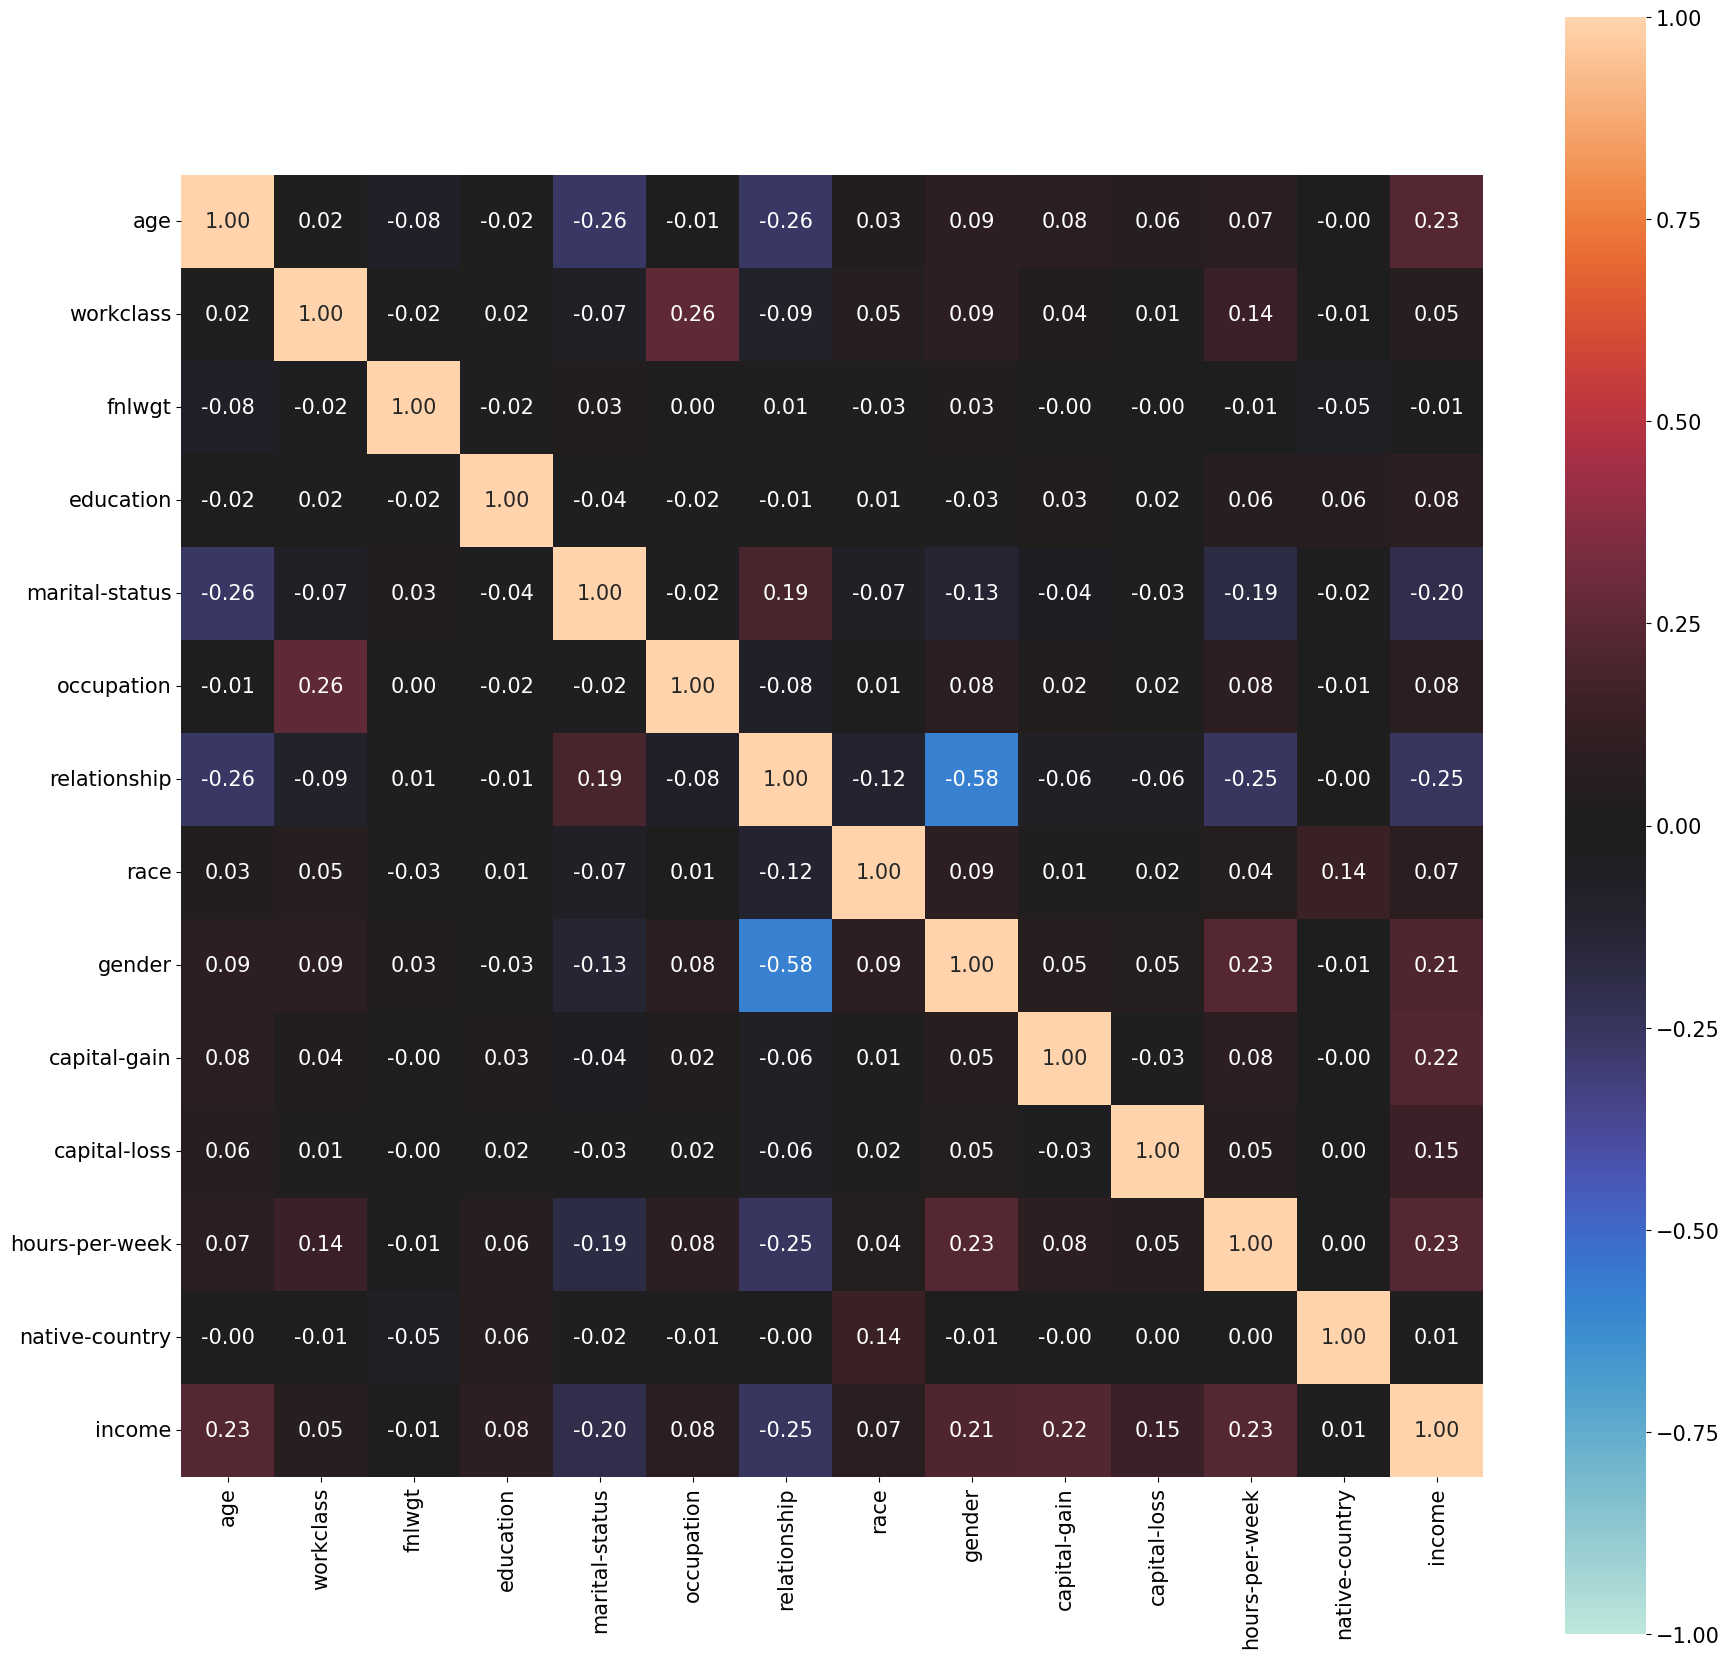

Fake data: ../data_generation/synthetic_data/adult_target_epochs_100_epsilon_None.csv


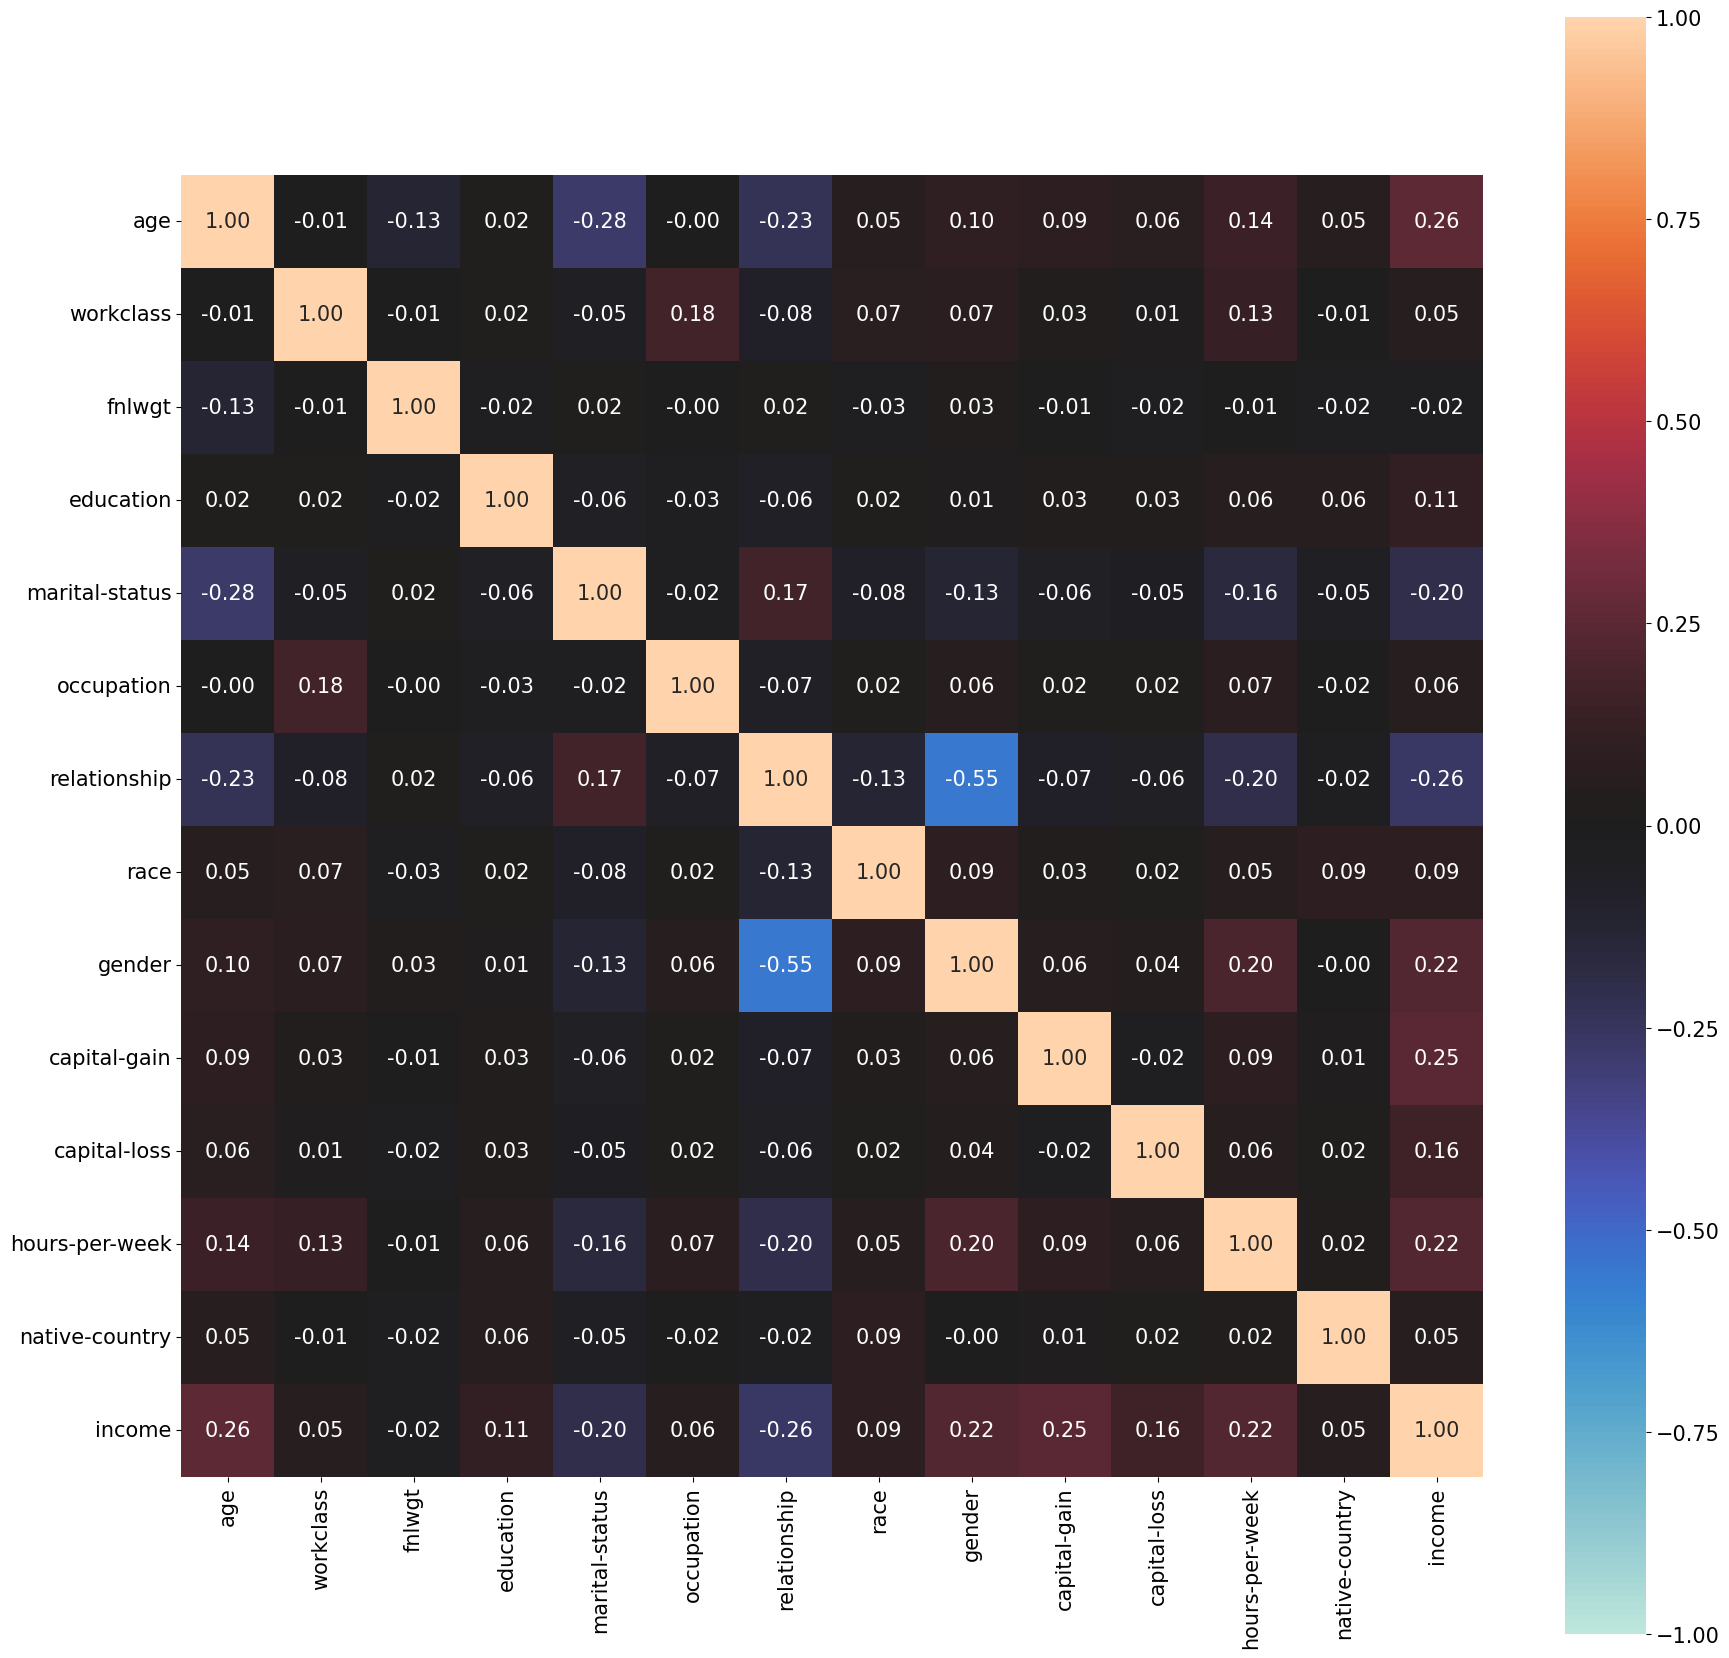

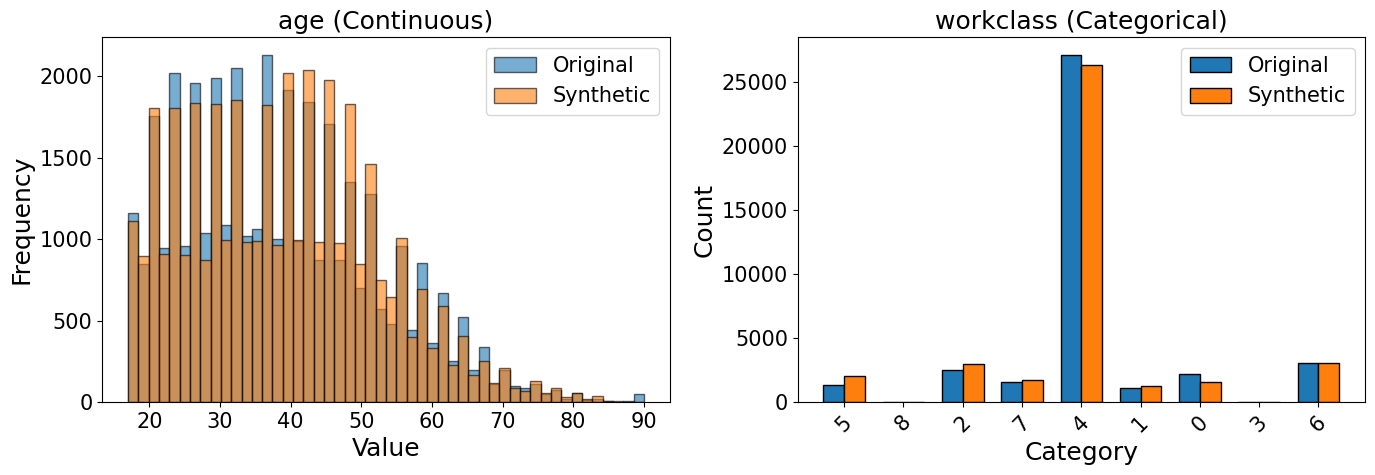

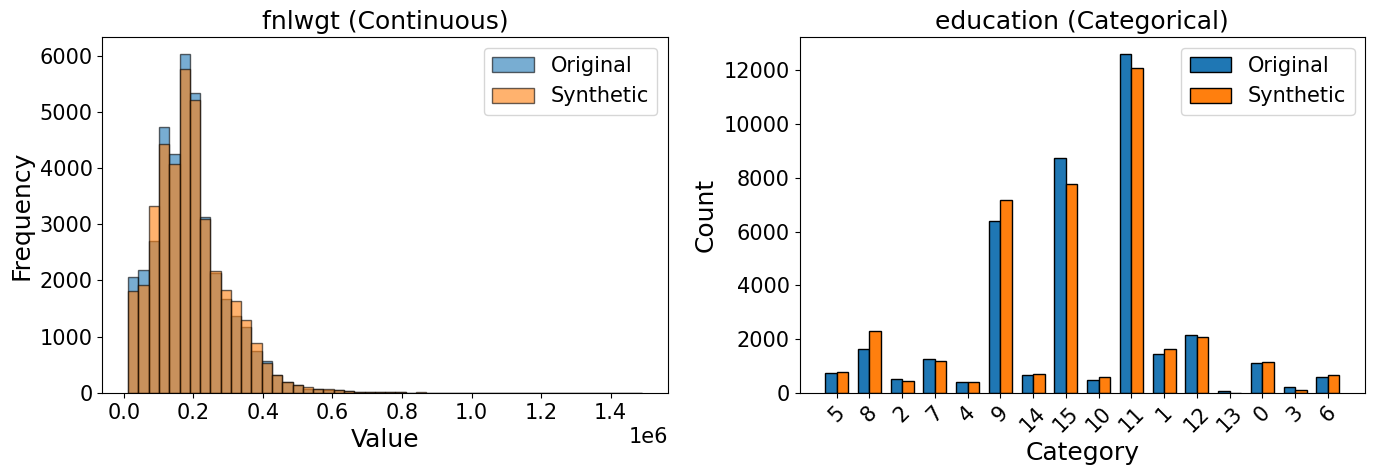

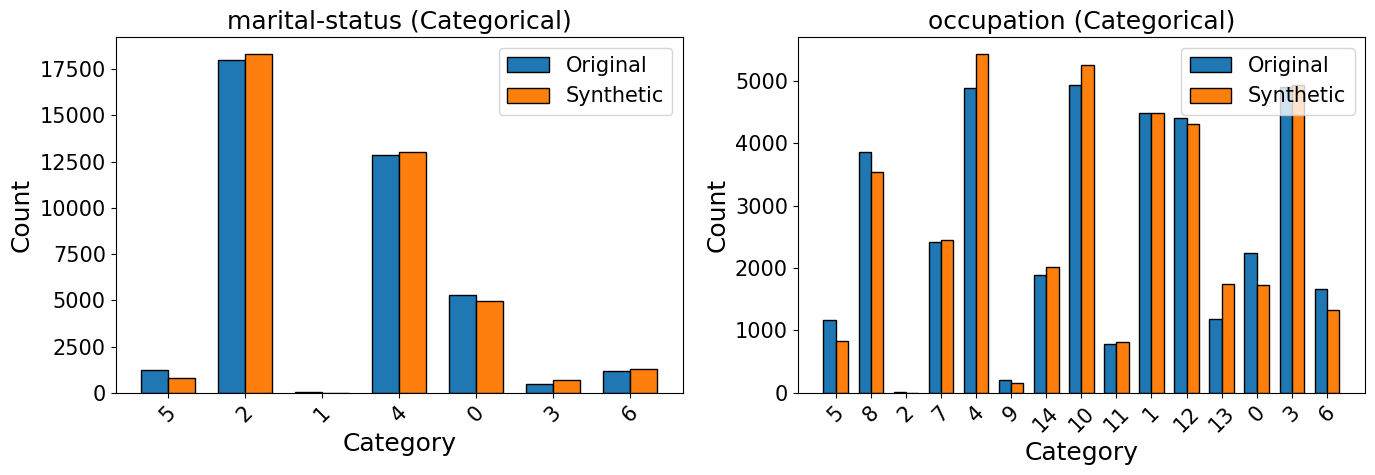

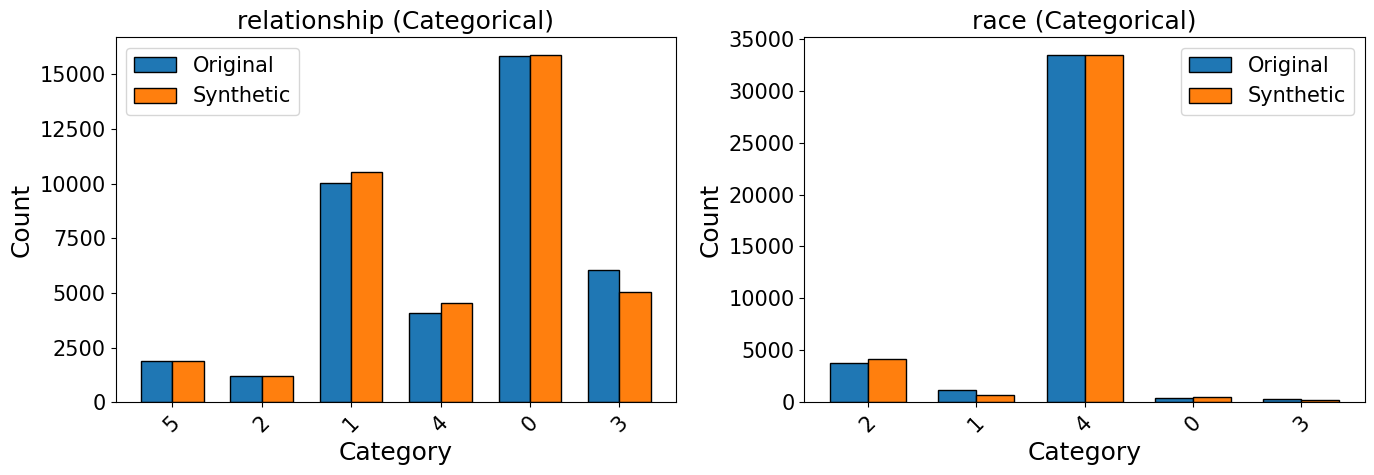

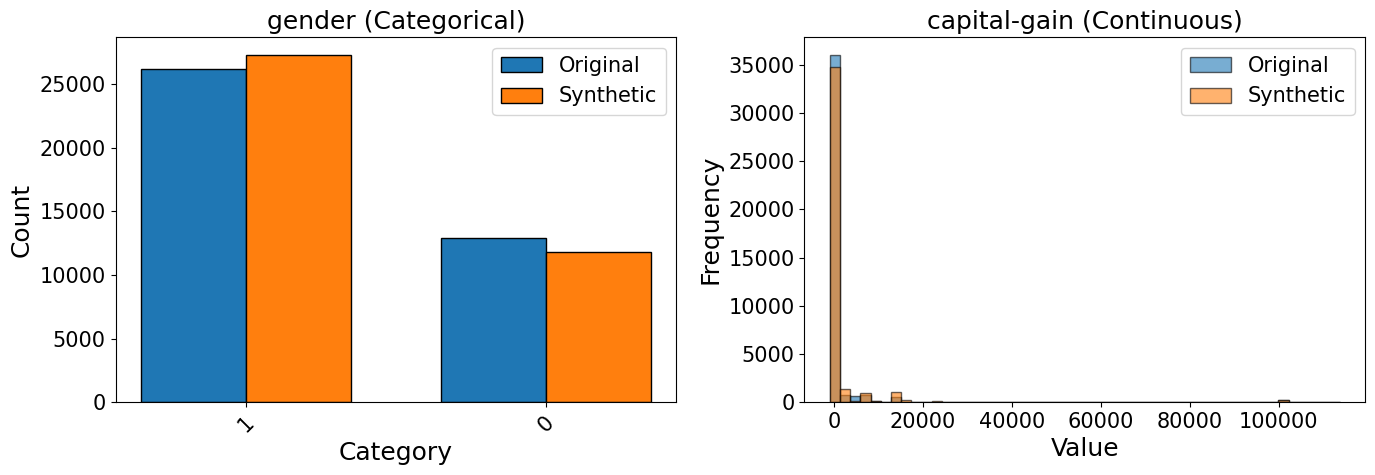

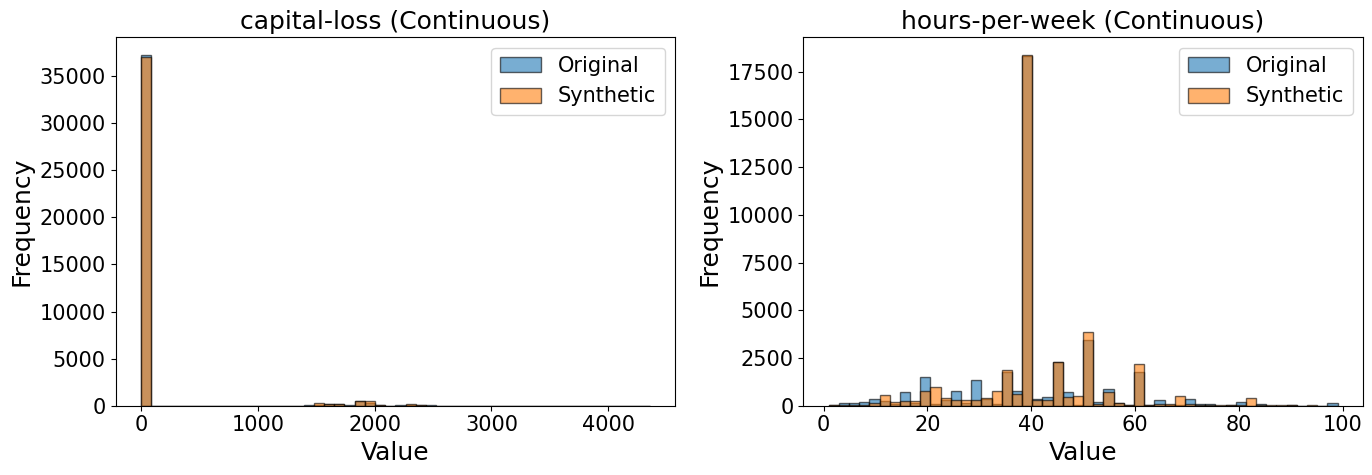

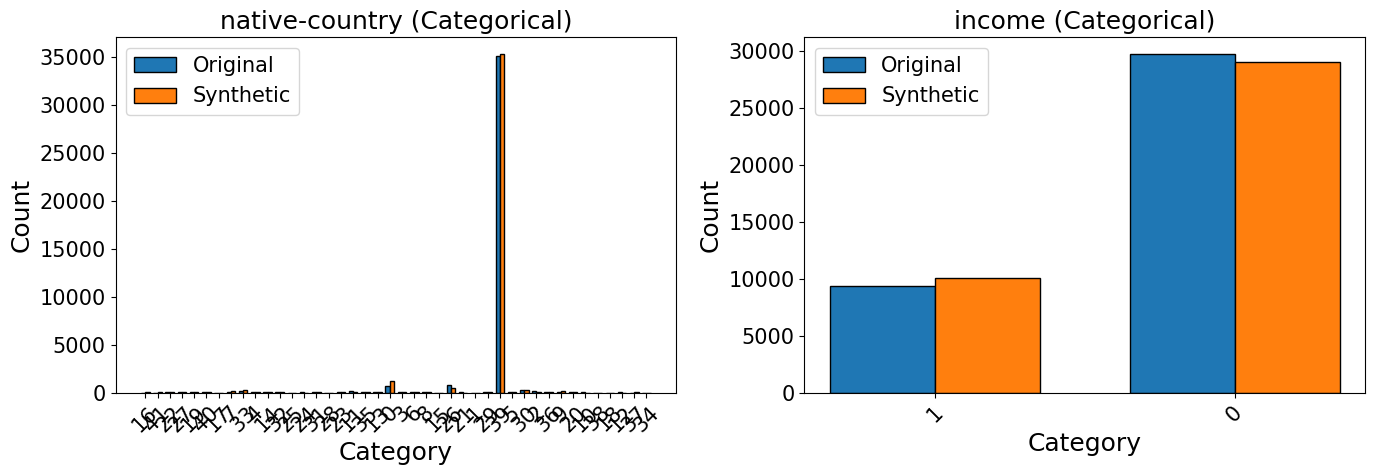

In [3]:


real = pd.read_csv('../datasets/Adult.csv')

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                         'relationship', 'race', 'gender', 'native-country','income']

train, test = evaluation.split_data(real, 0.2, "income",random_state=22)

fakes = [
    '../data_generation/synthetic_data/adult_target_epochs_100_epsilon_None.csv',
    '../data_generation/synthetic_data/adult_target_epochs_100_epsilon_15.csv',
    '../data_generation/synthetic_data/adult_target_epochs_100_epsilon_5.csv',
    '../data_generation/synthetic_data/adult_target_epochs_100_epsilon_1.csv',
]

from dython.nominal import associations

real_corr = associations(real)["corr"]

for fake_path in fakes:
    fake = pd.read_csv(fake_path)
    print(f'Fake data: {fake_path}')
    fake_corr = associations(fake)["corr"]
    compare_dataframes(train,fake,{},categorical_columns=categorical_columns)
    
    
    break
    


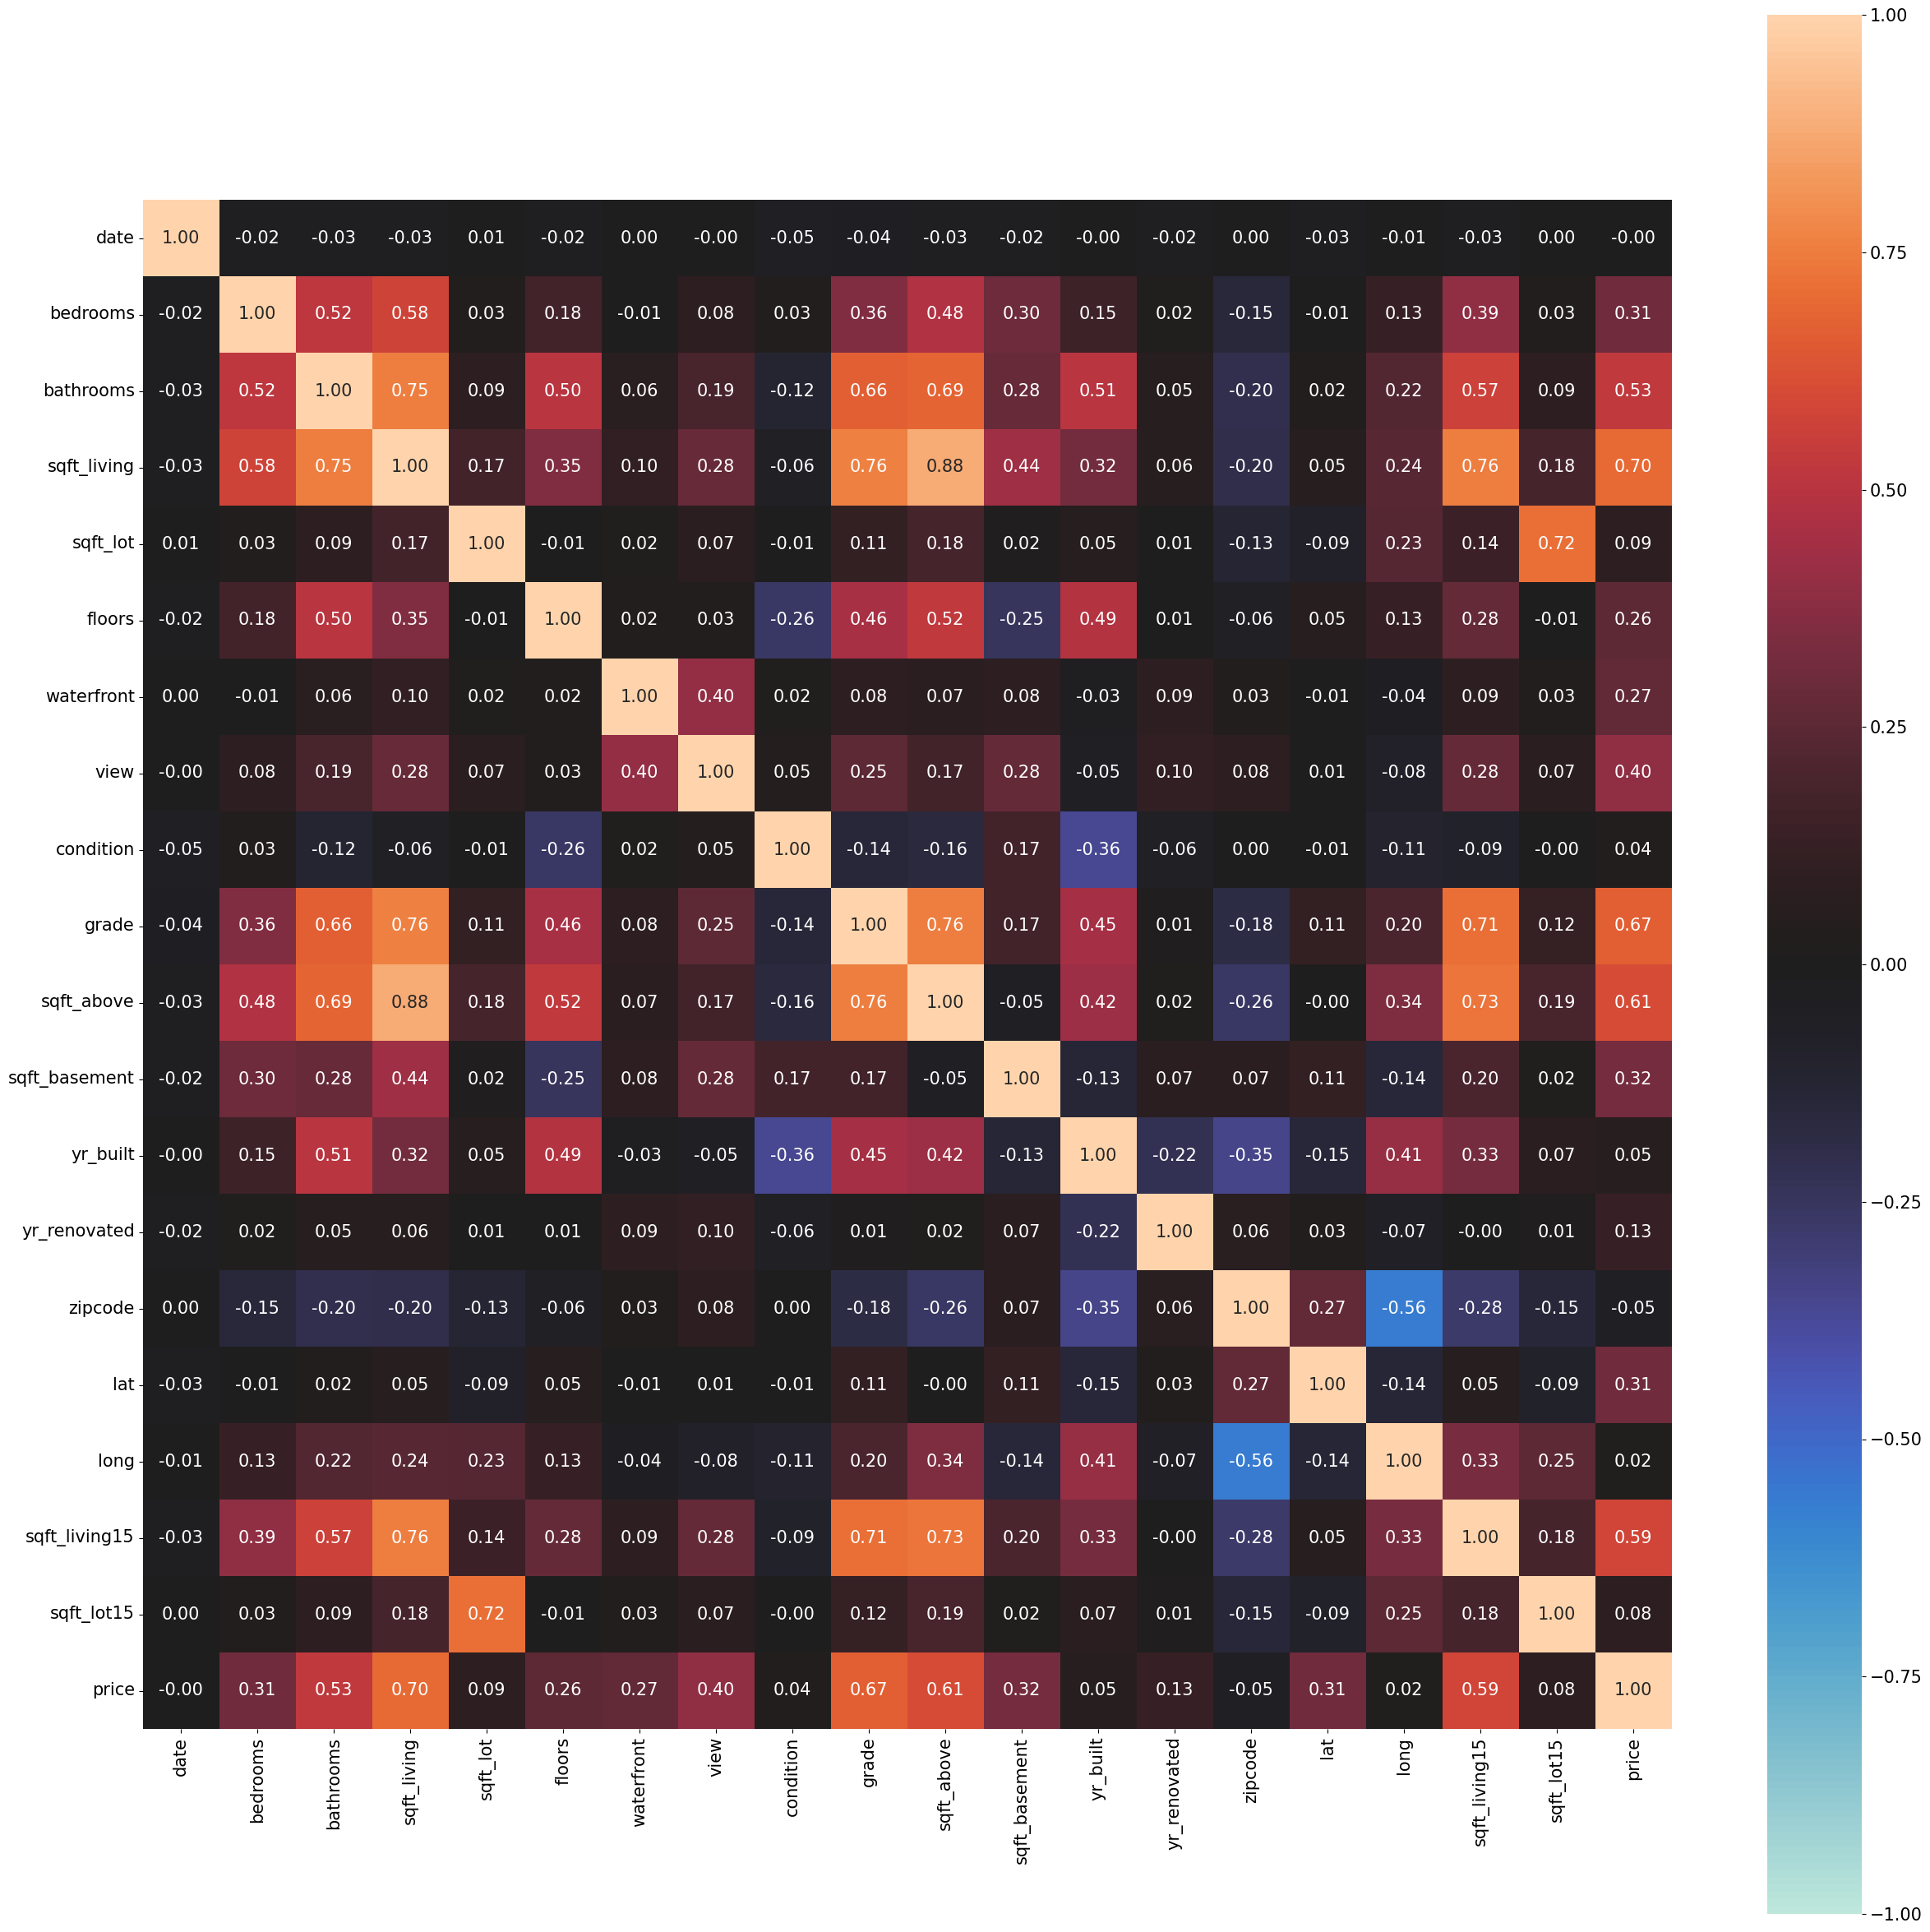

Fake data: ../data_generation/synthetic_data/king_epochs_100_epsilon_None.csv


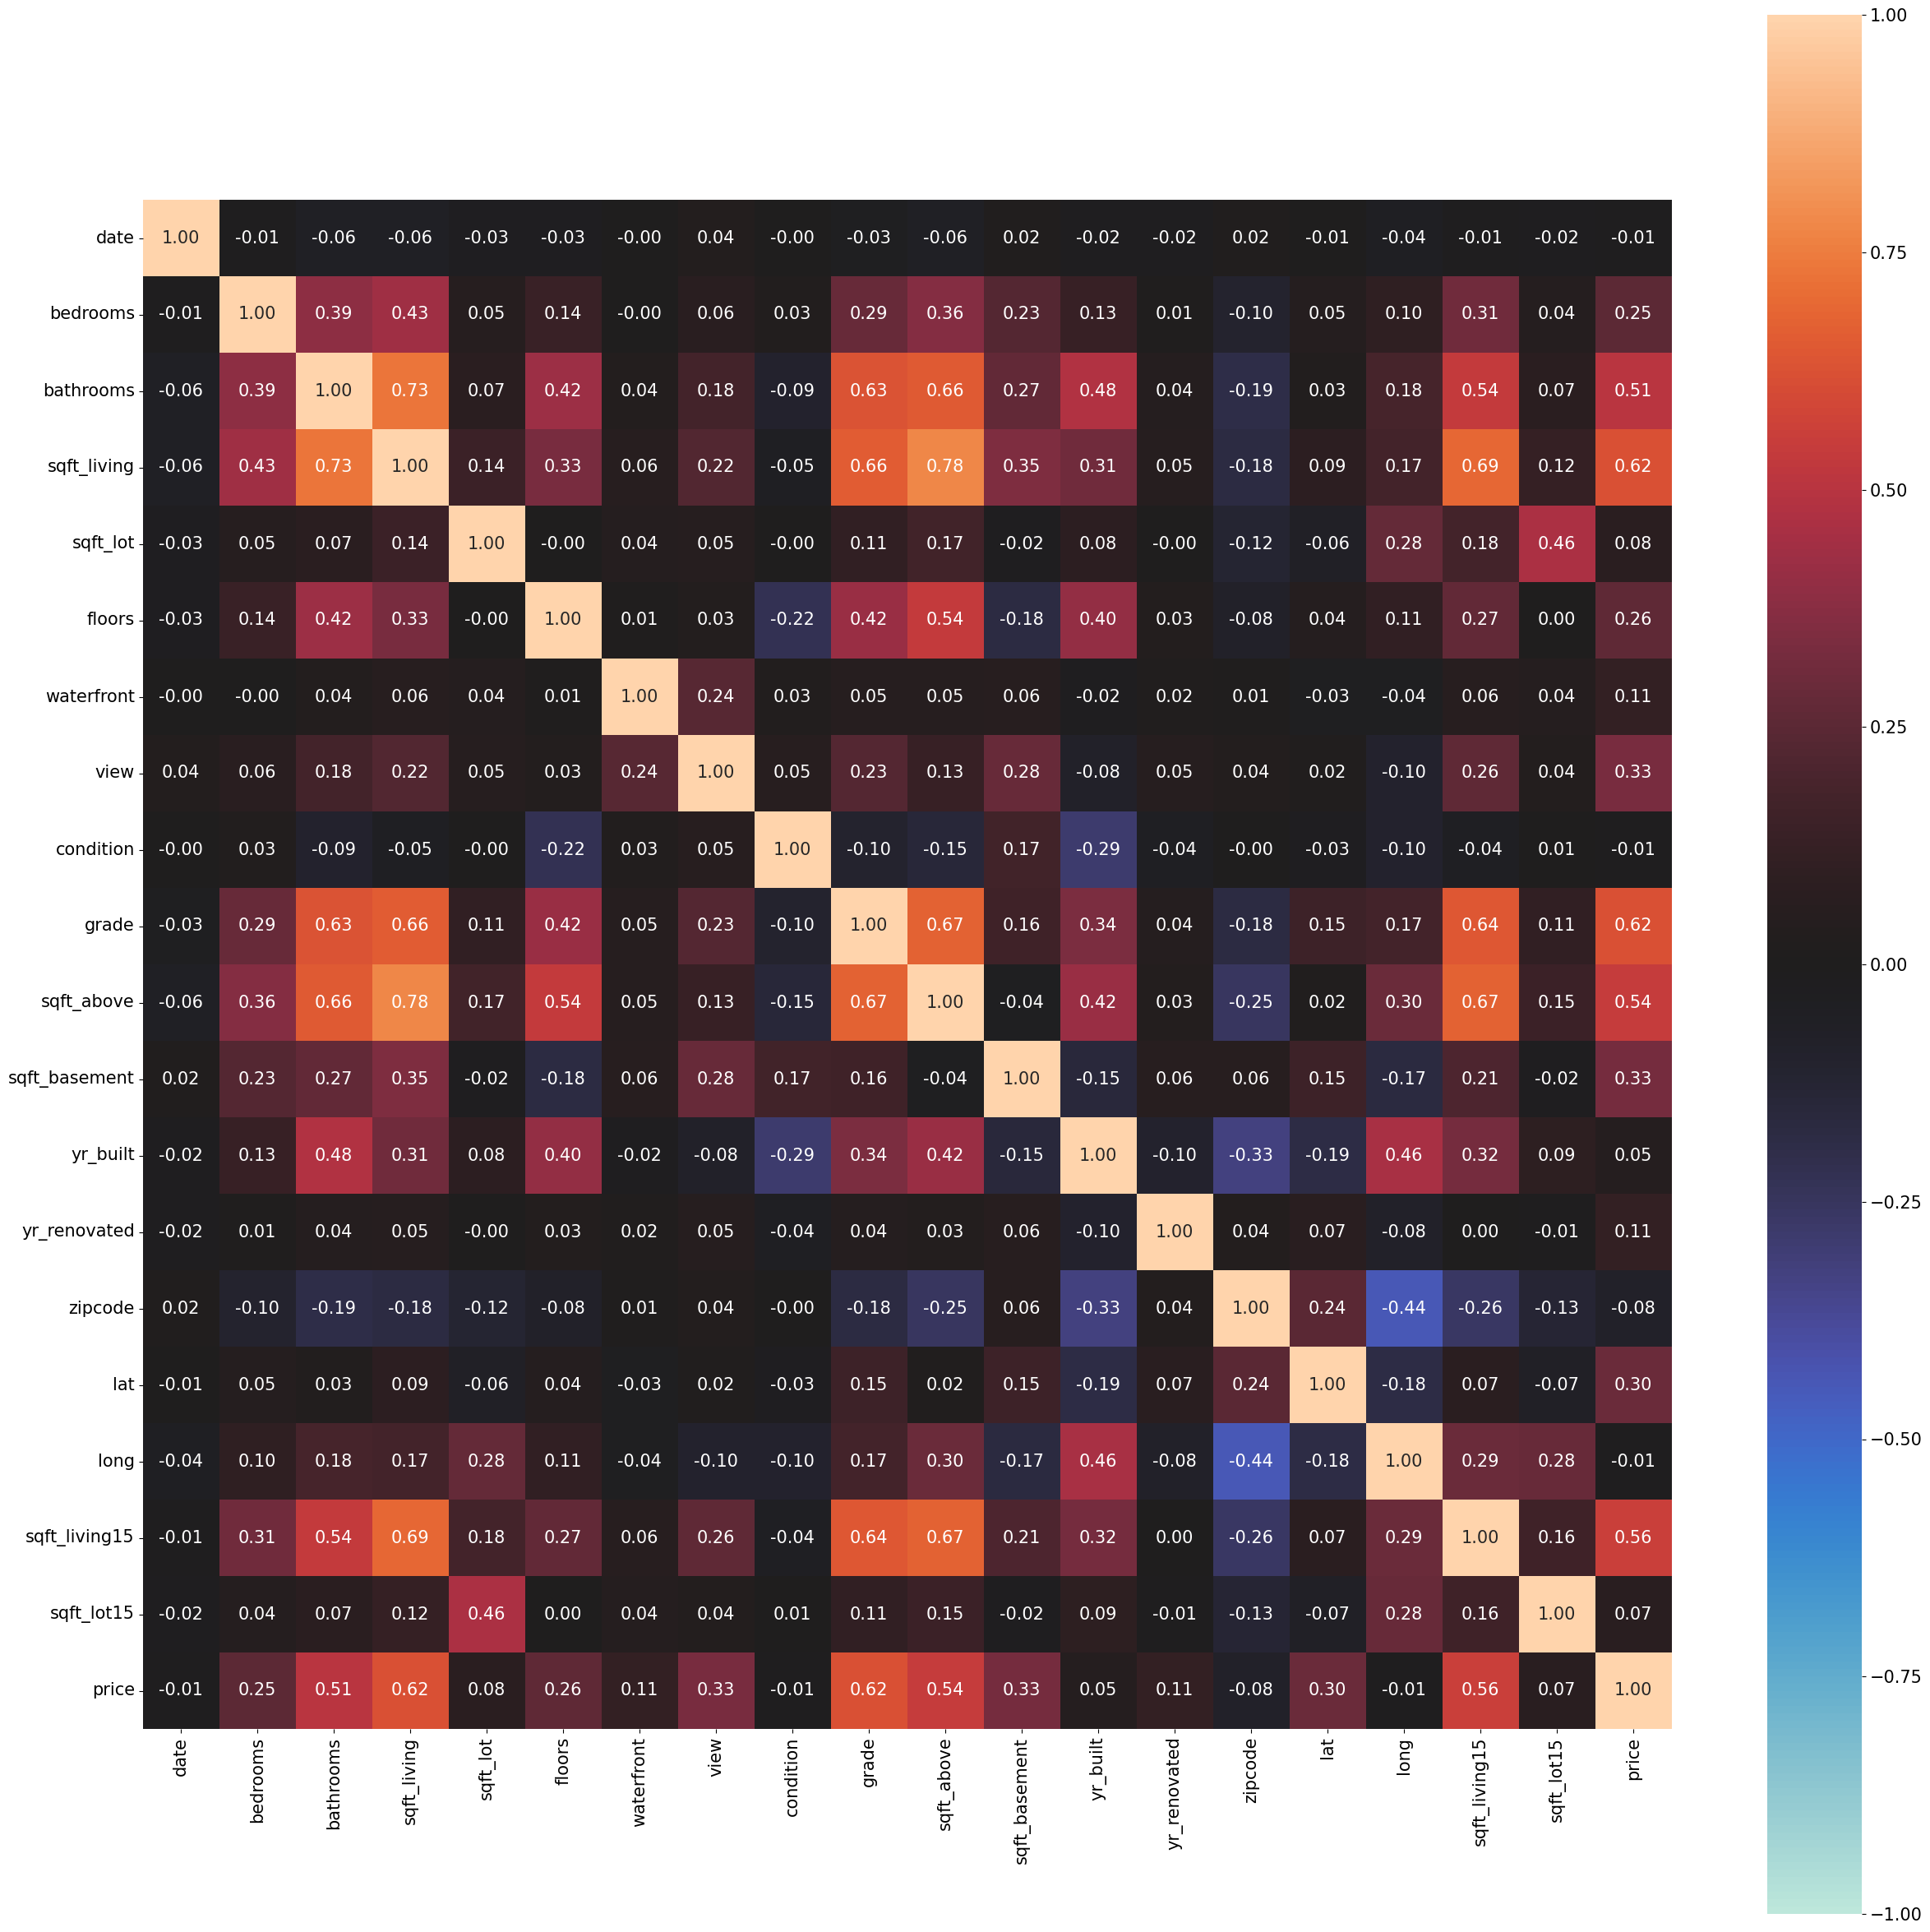

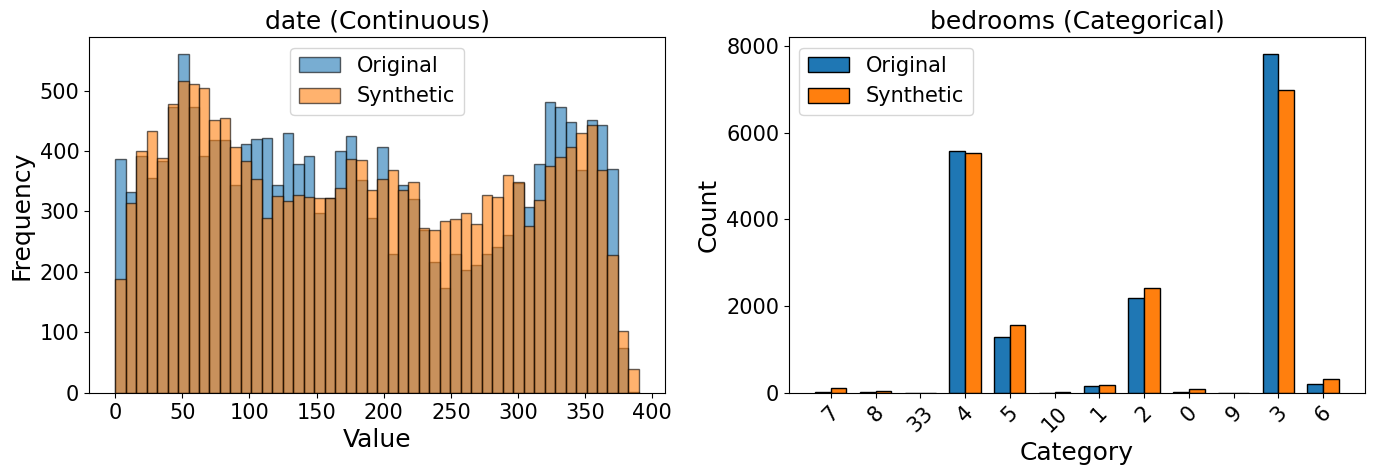

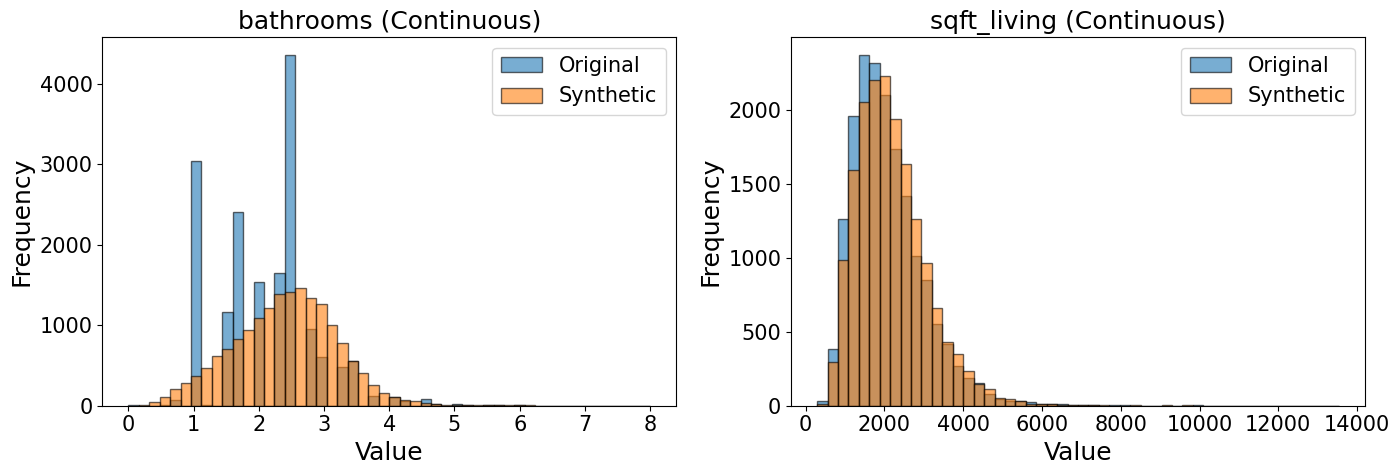

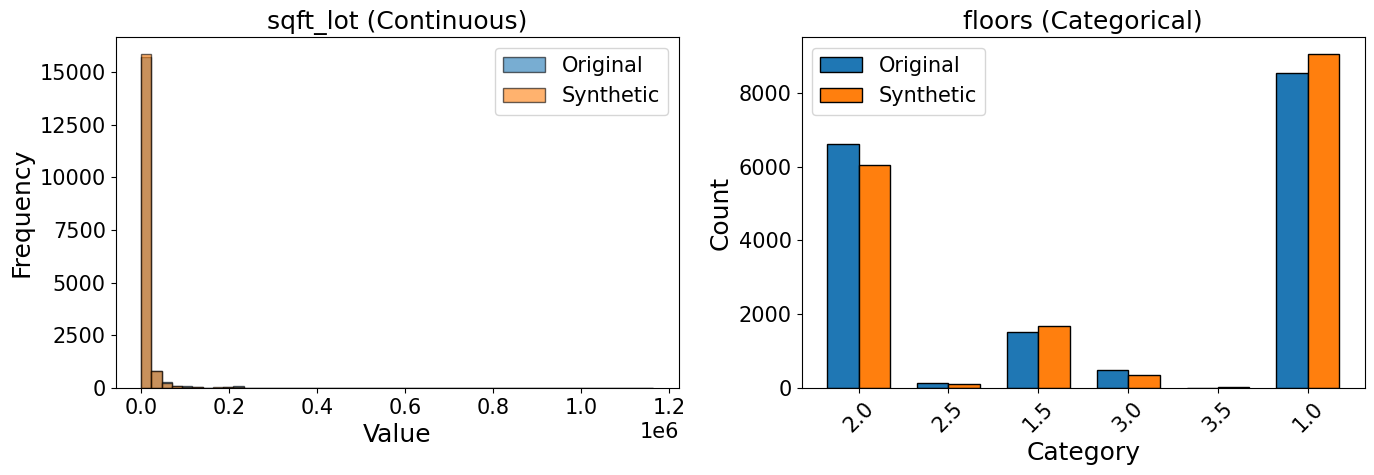

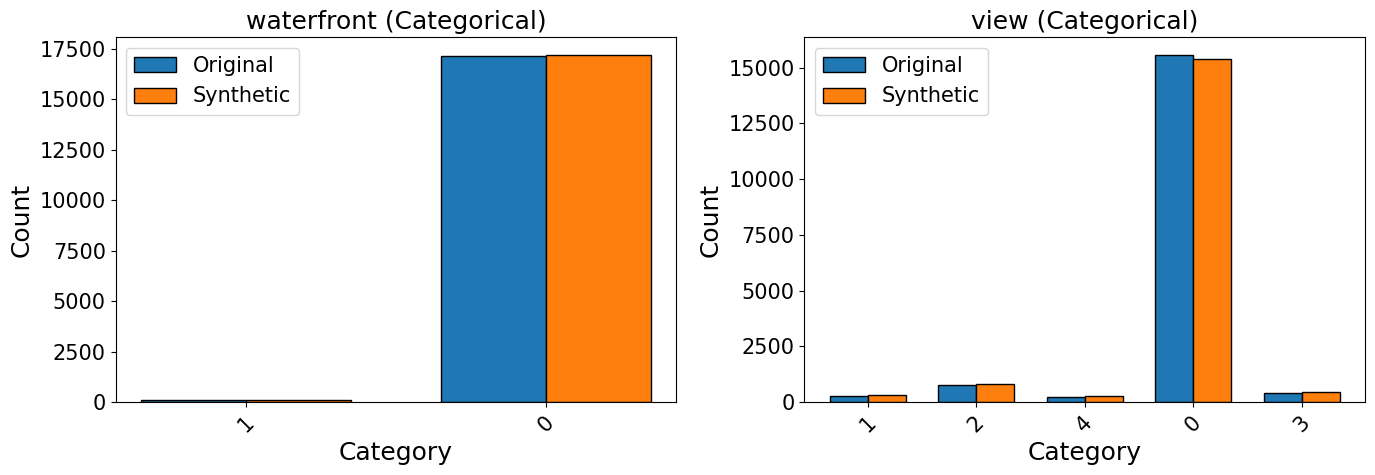

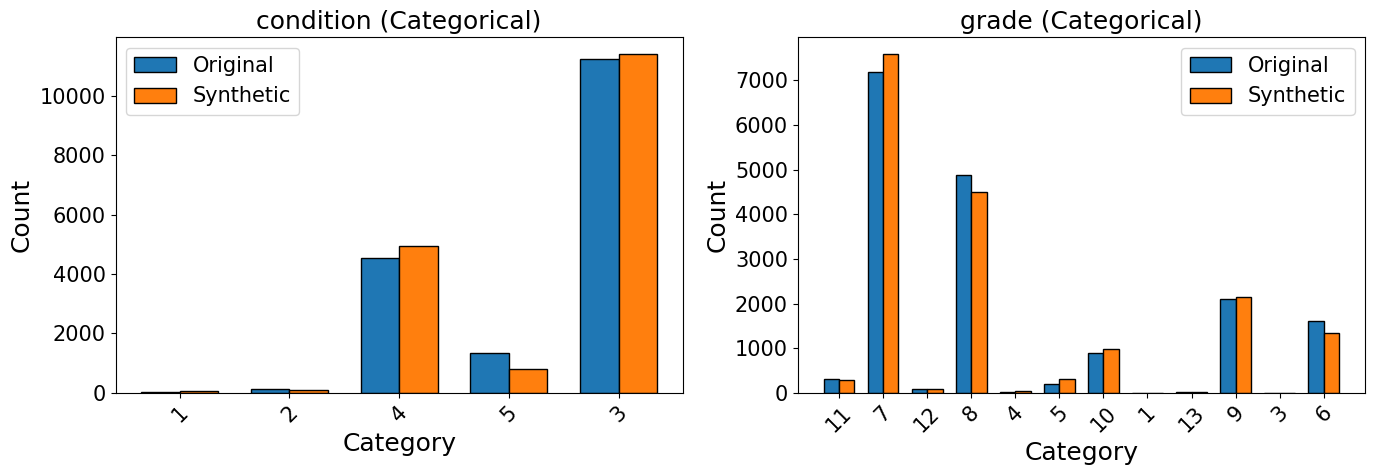

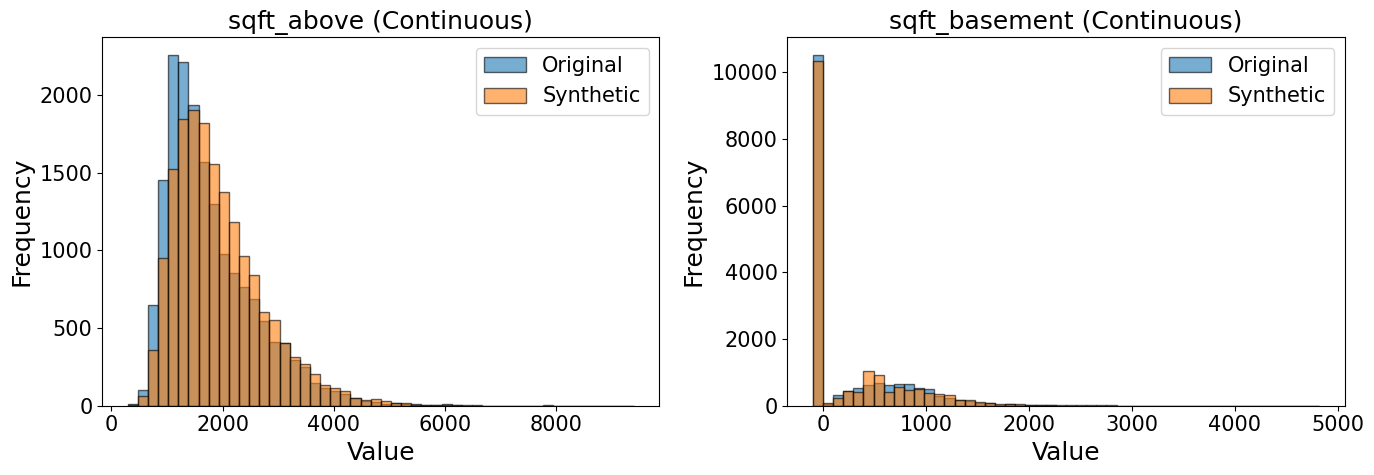

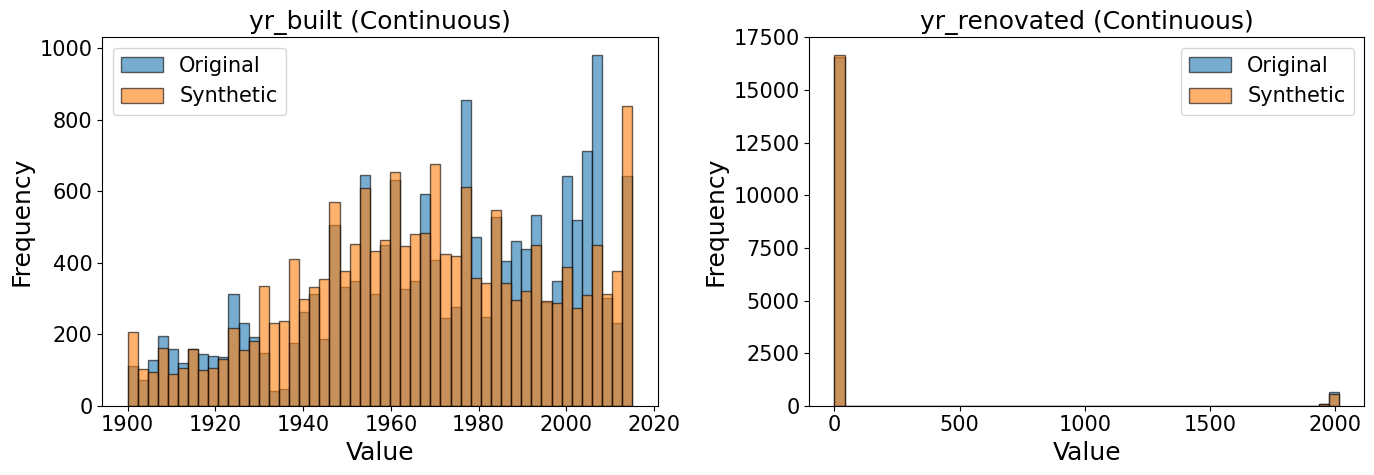

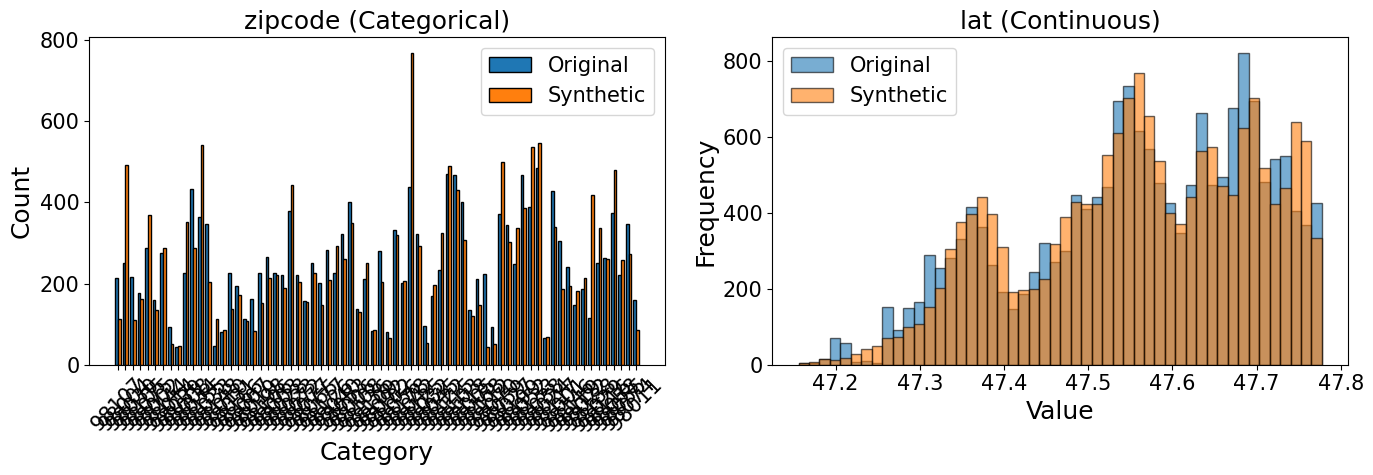

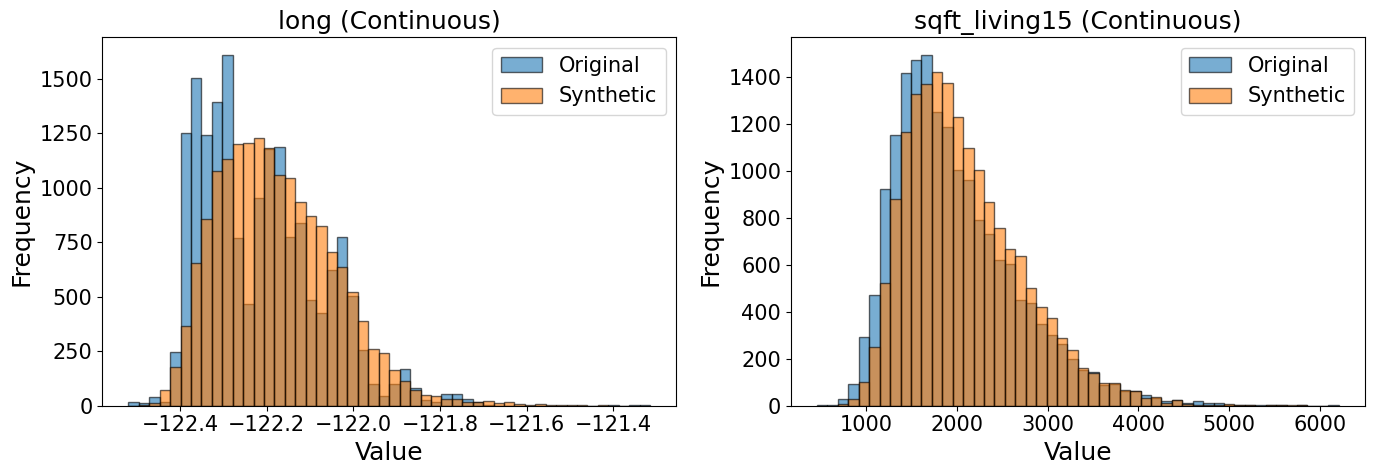

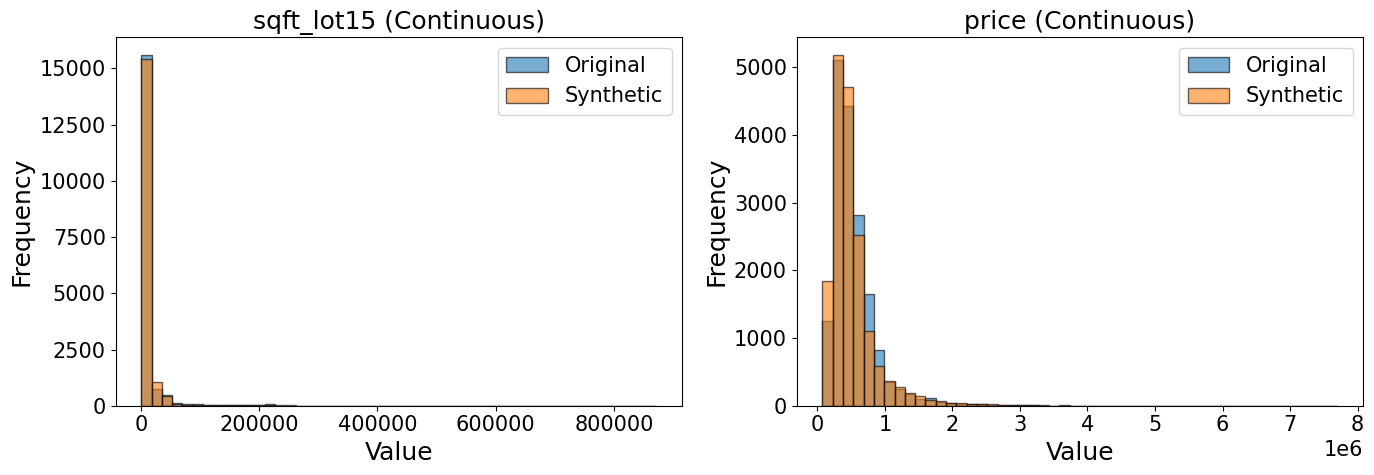

Fake data: ../data_generation/synthetic_data/king_epochs_100_epsilon_15.csv


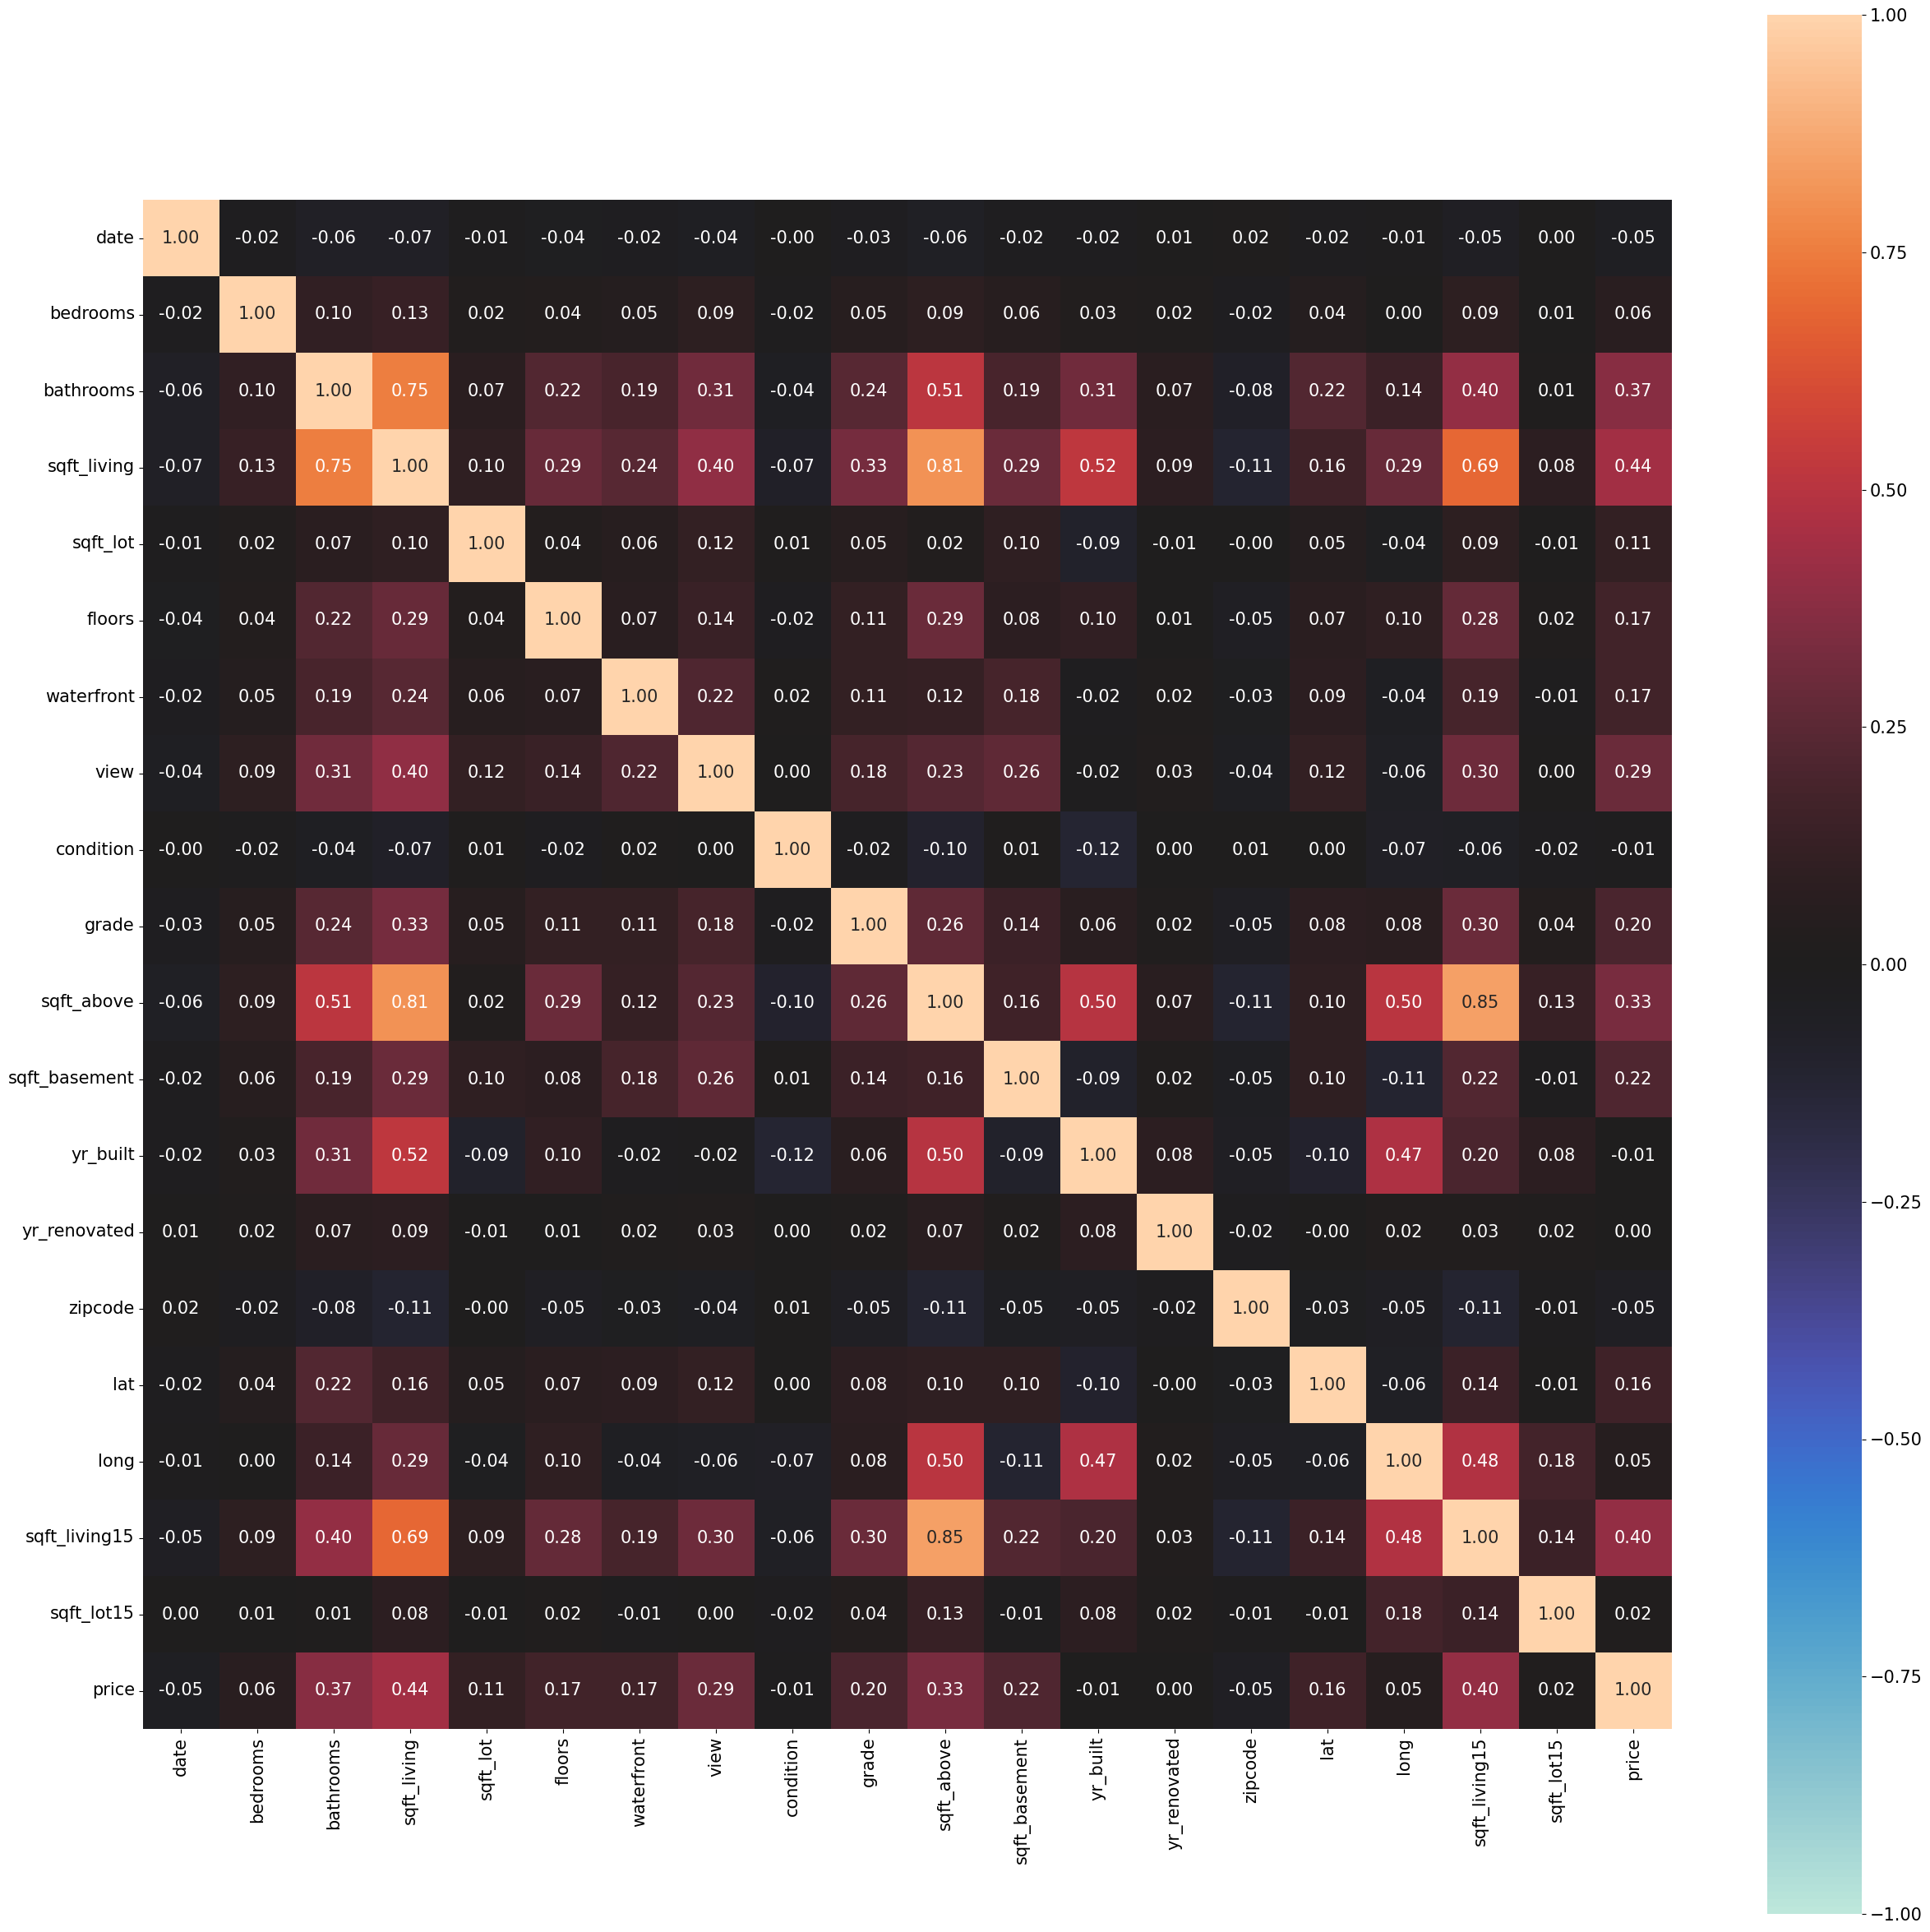

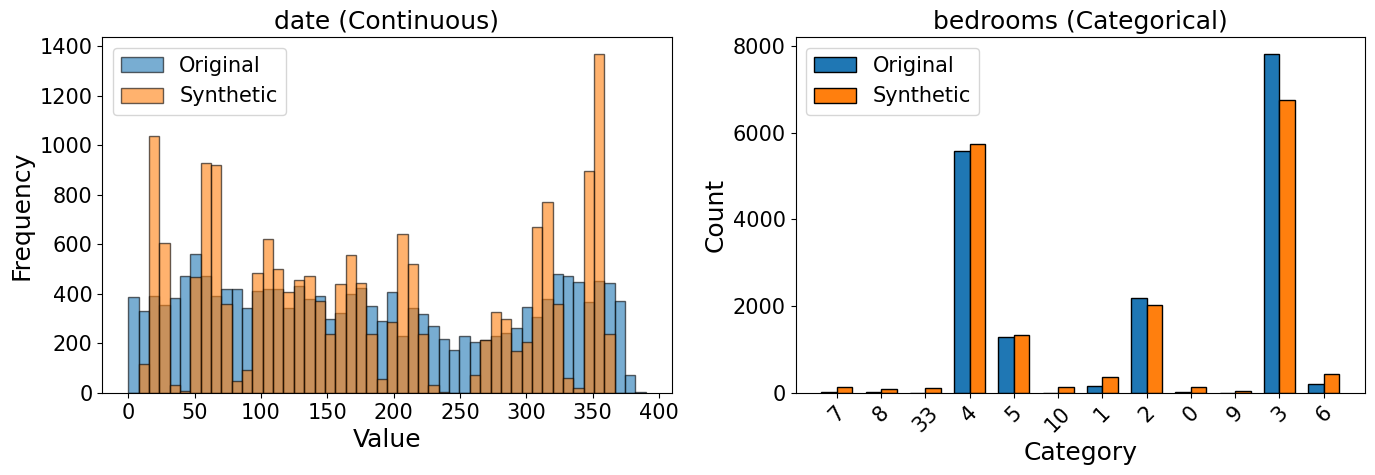

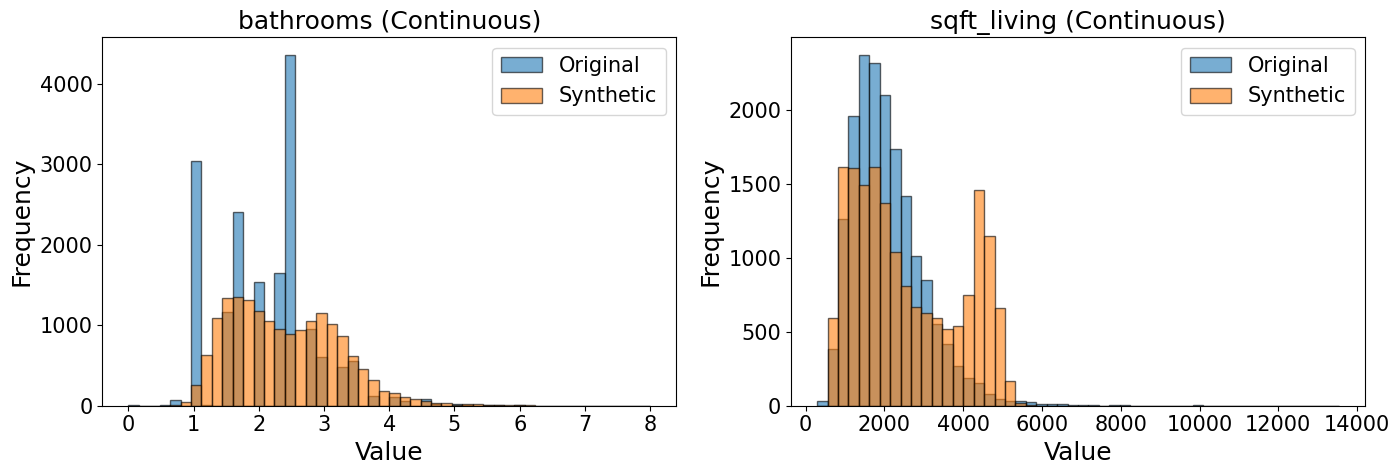

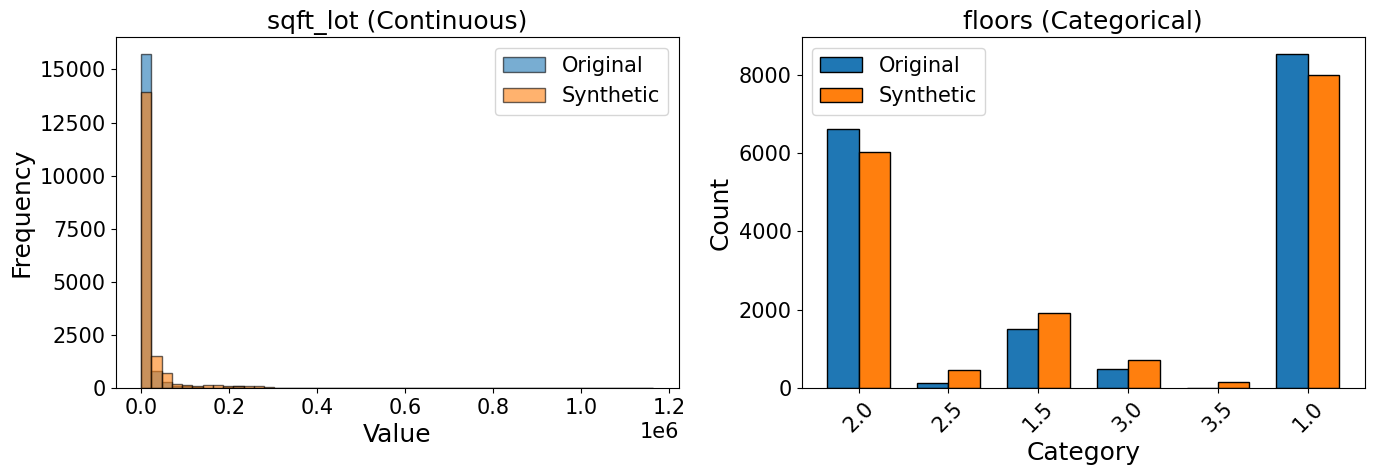

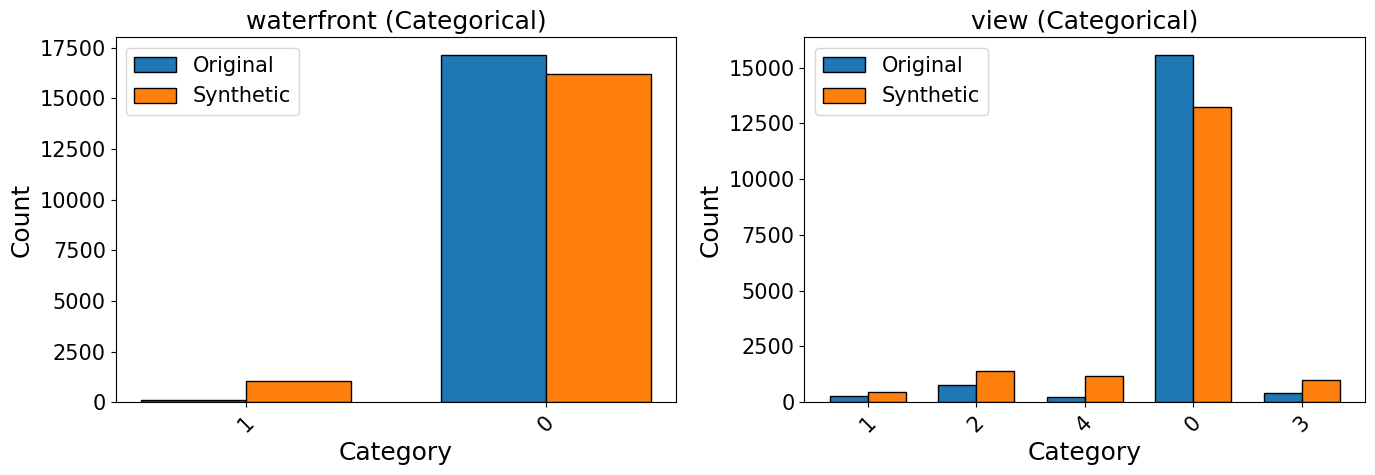

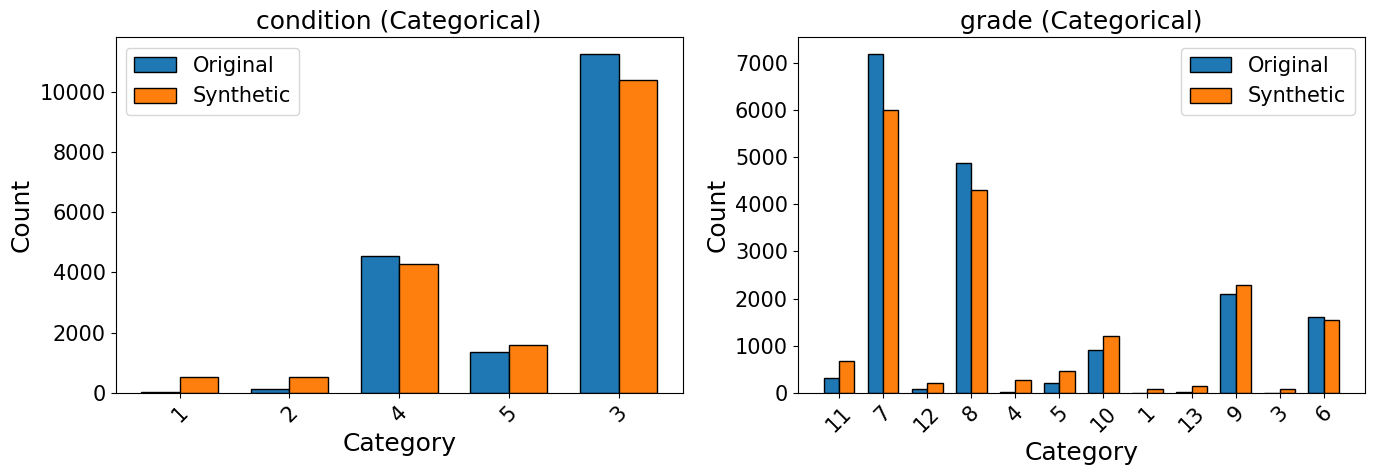

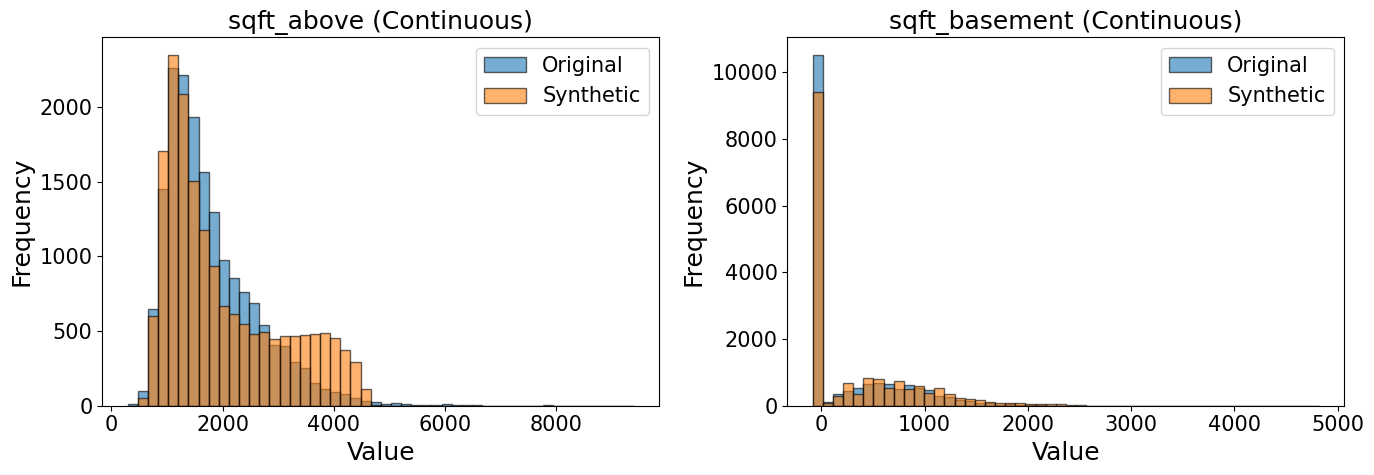

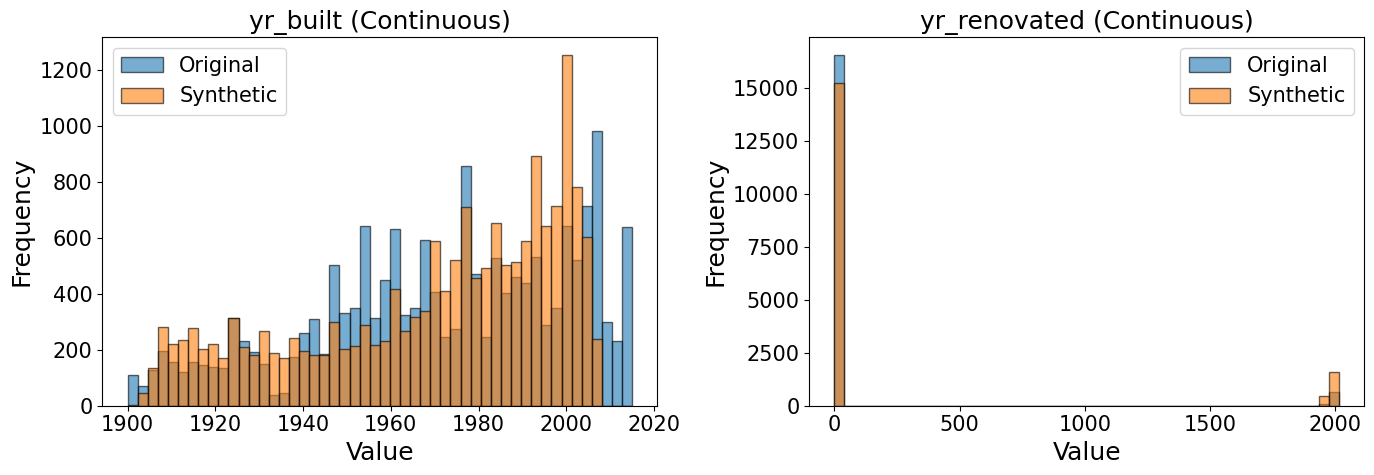

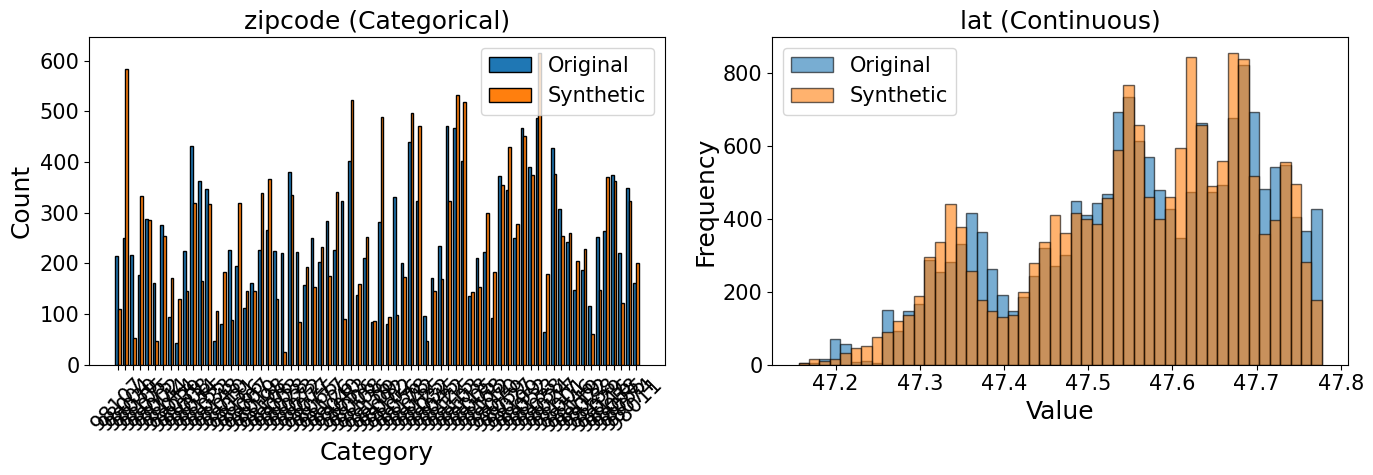

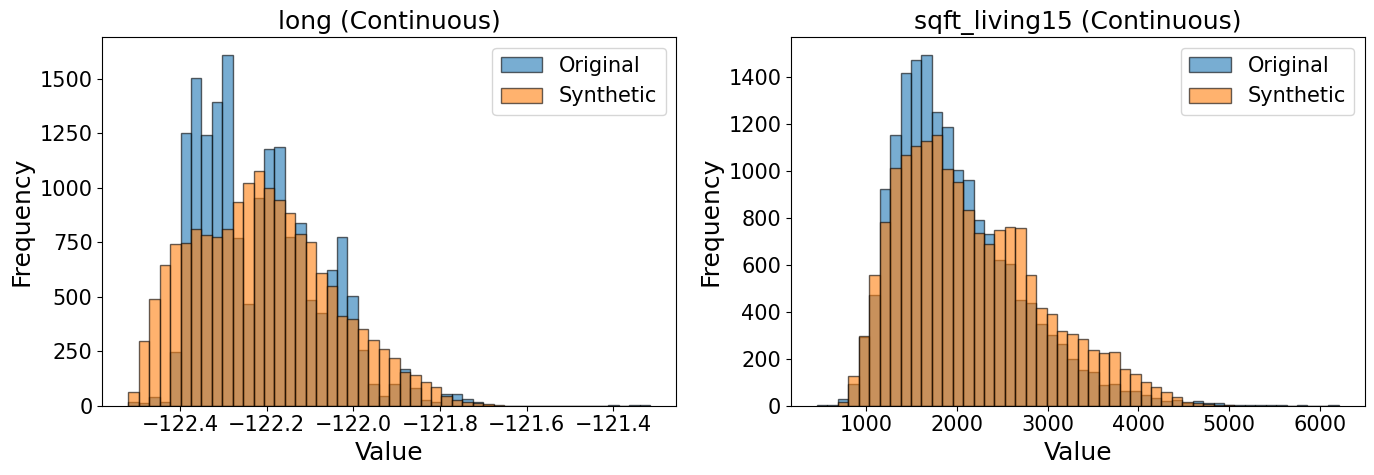

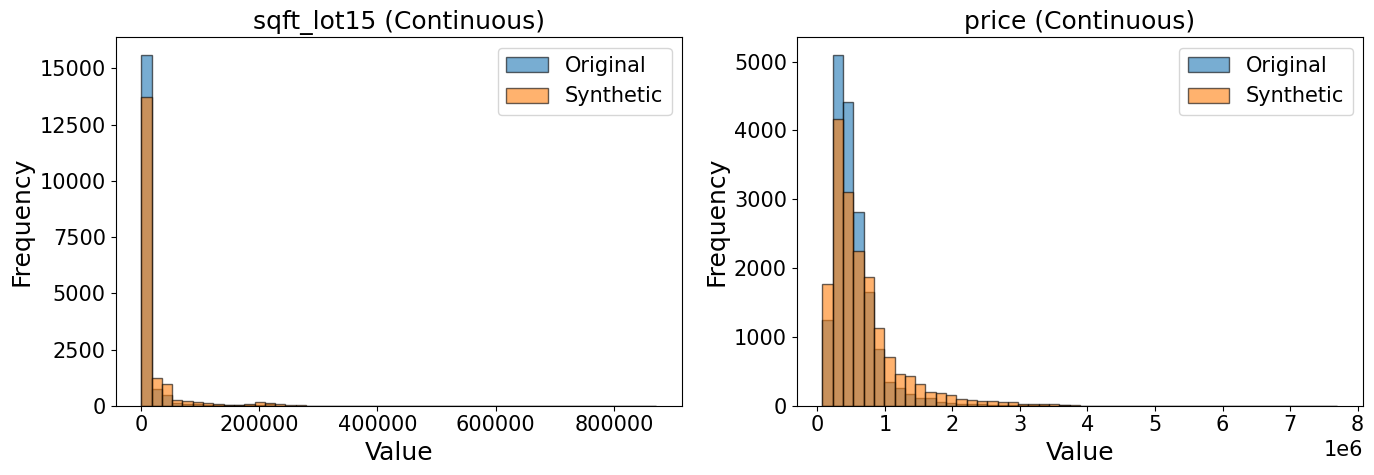

Fake data: ../data_generation/synthetic_data/king_epochs_100_epsilon_5.csv


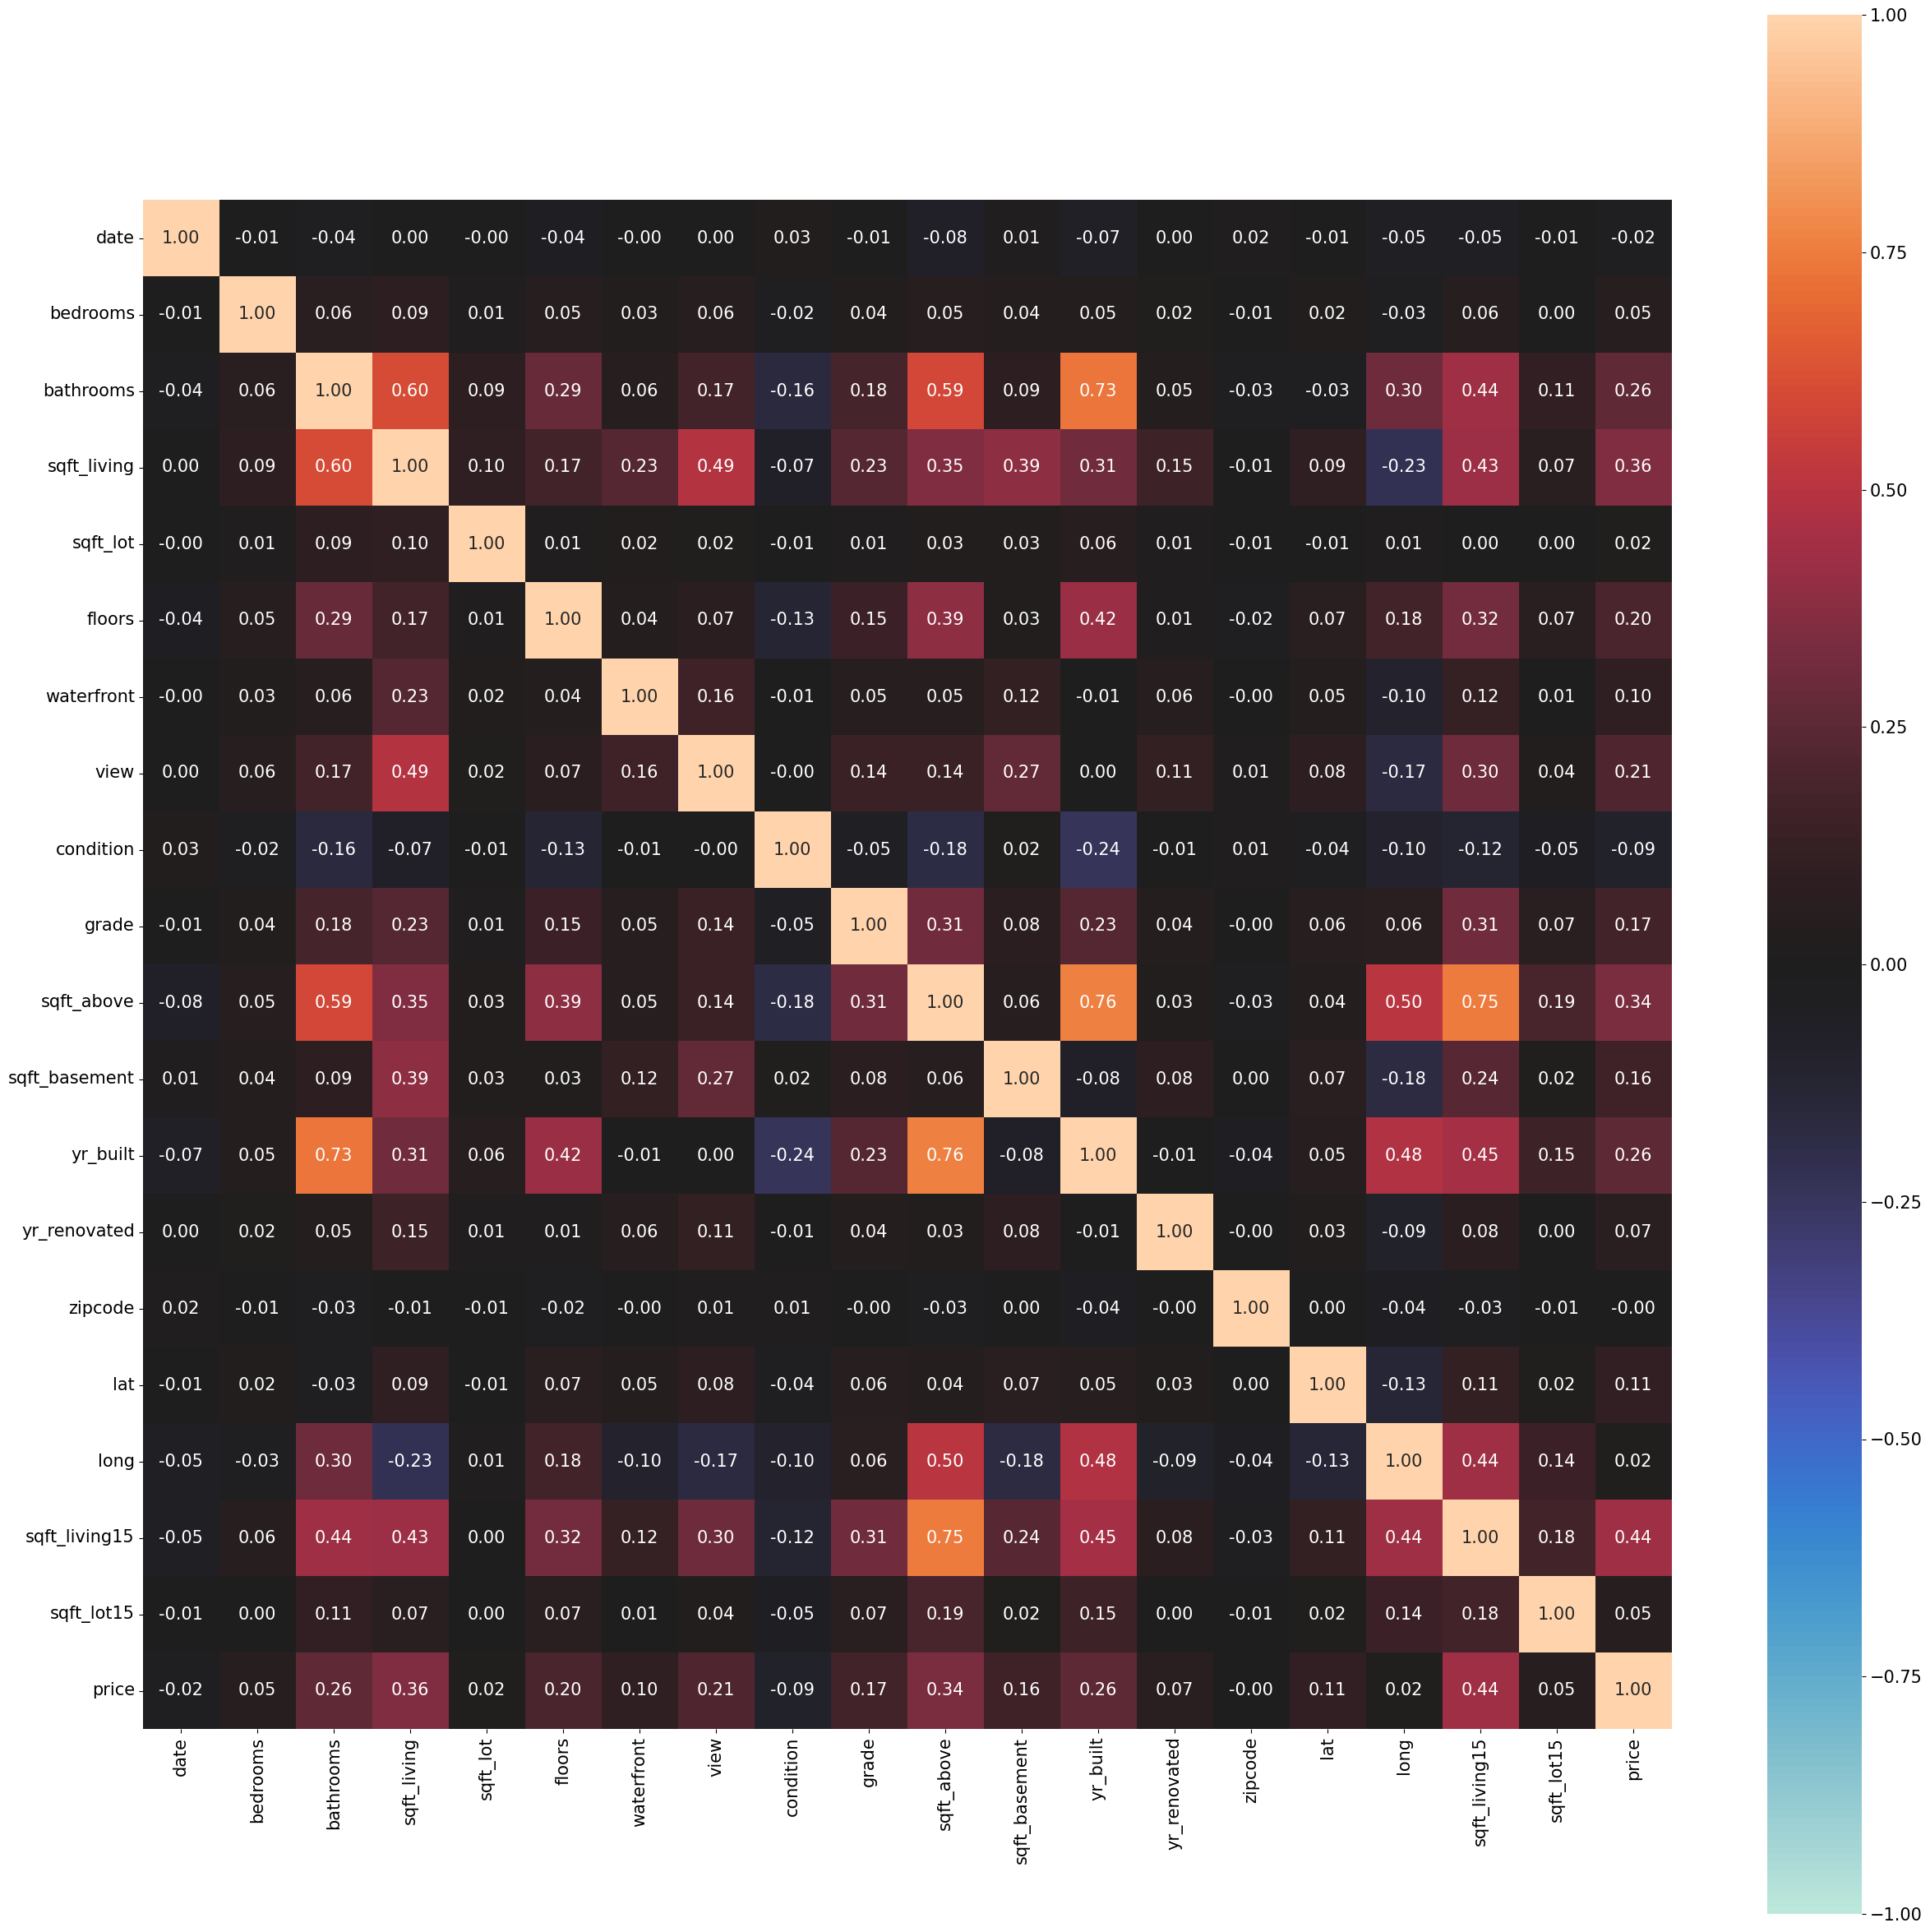

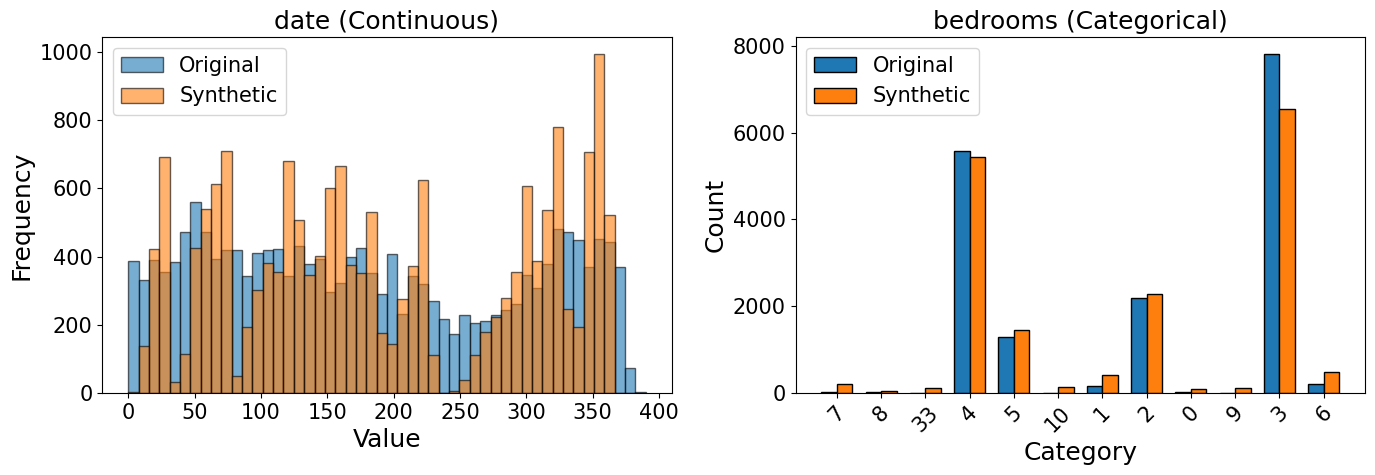

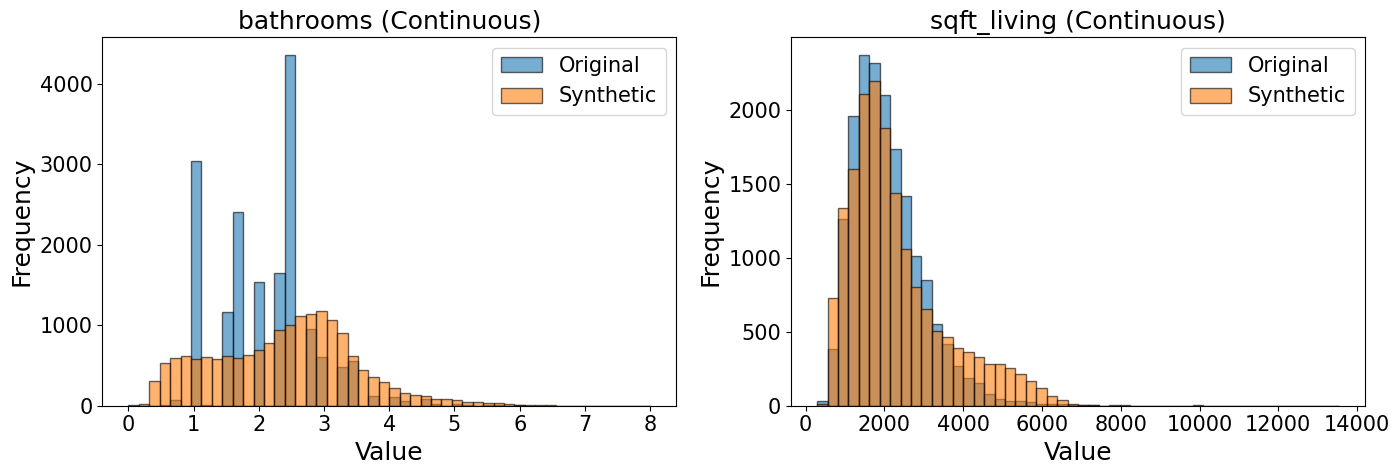

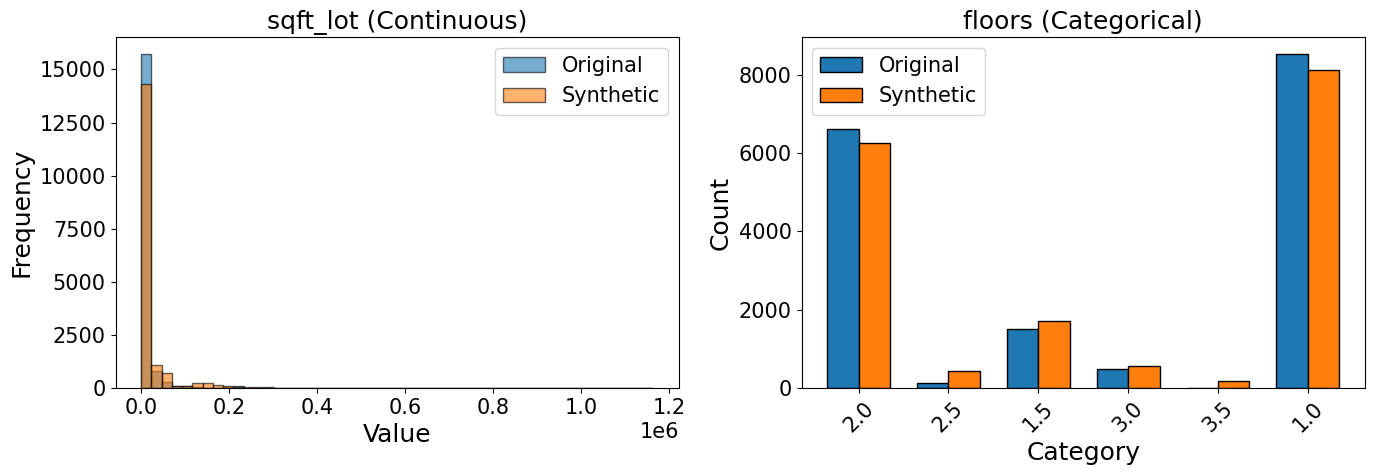

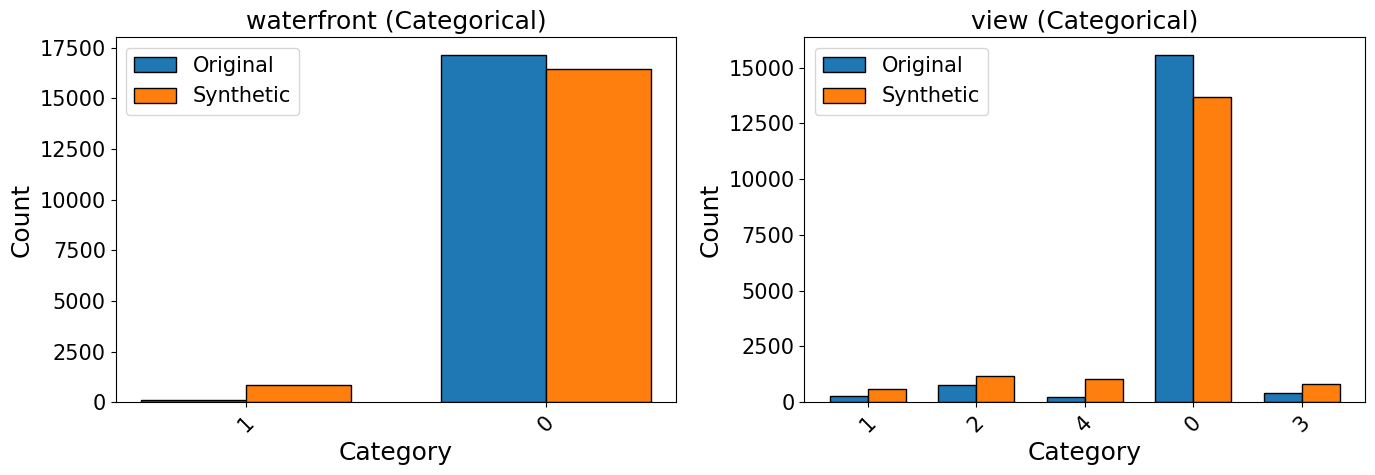

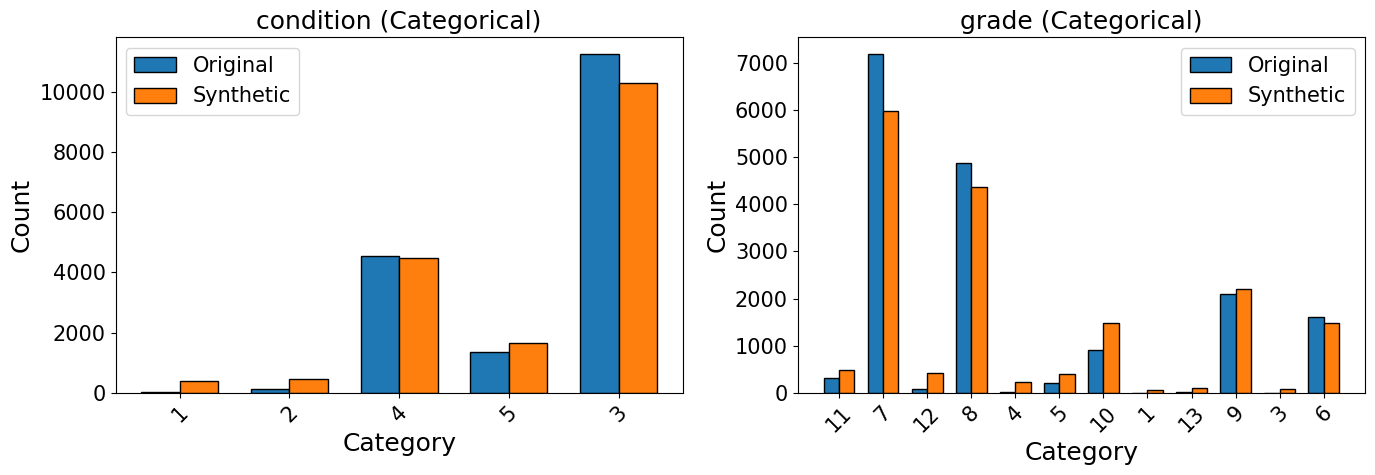

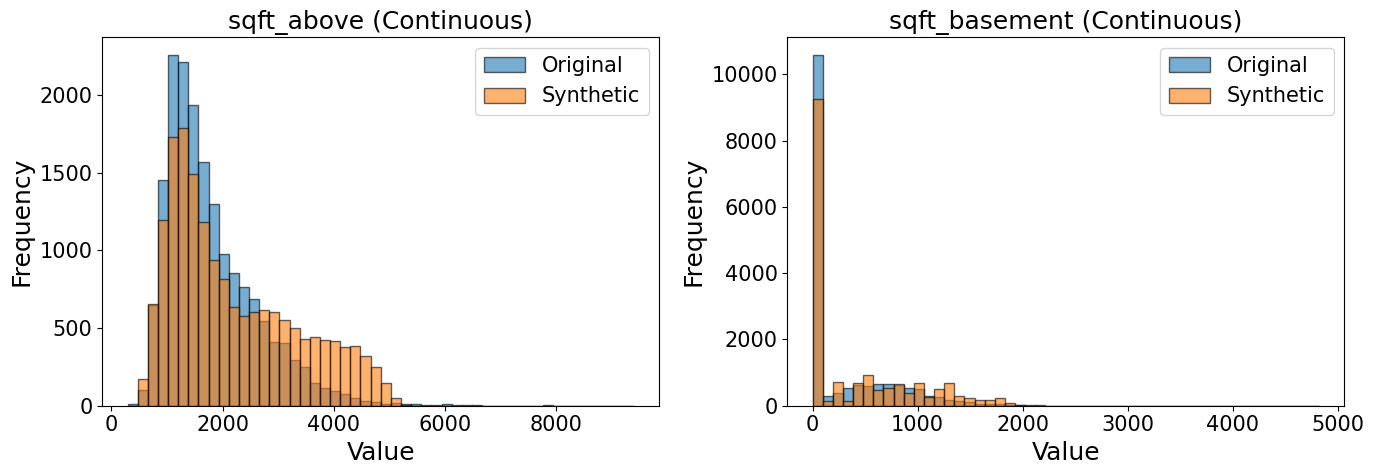

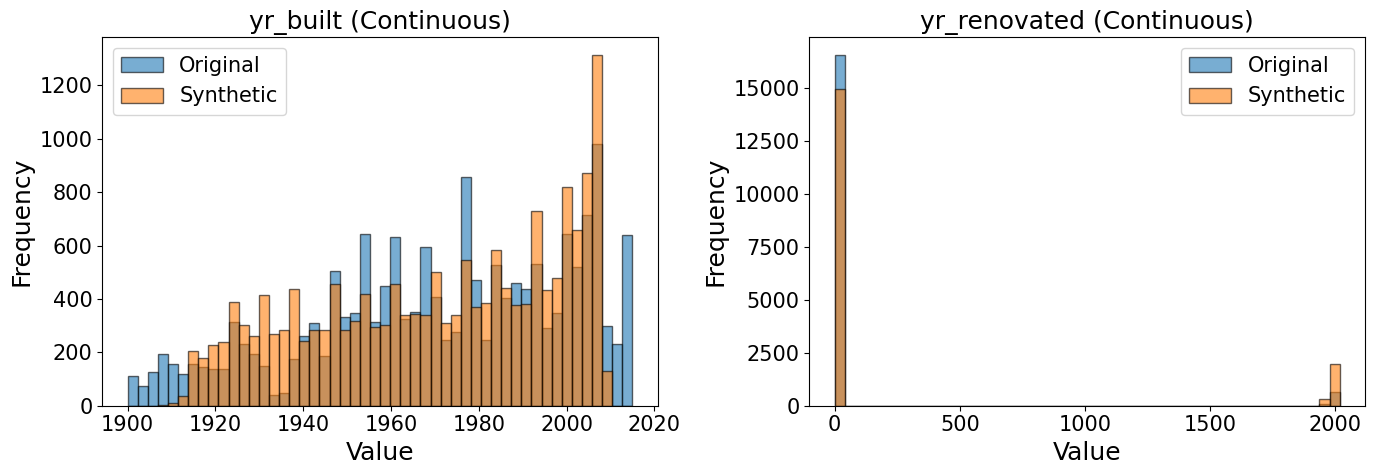

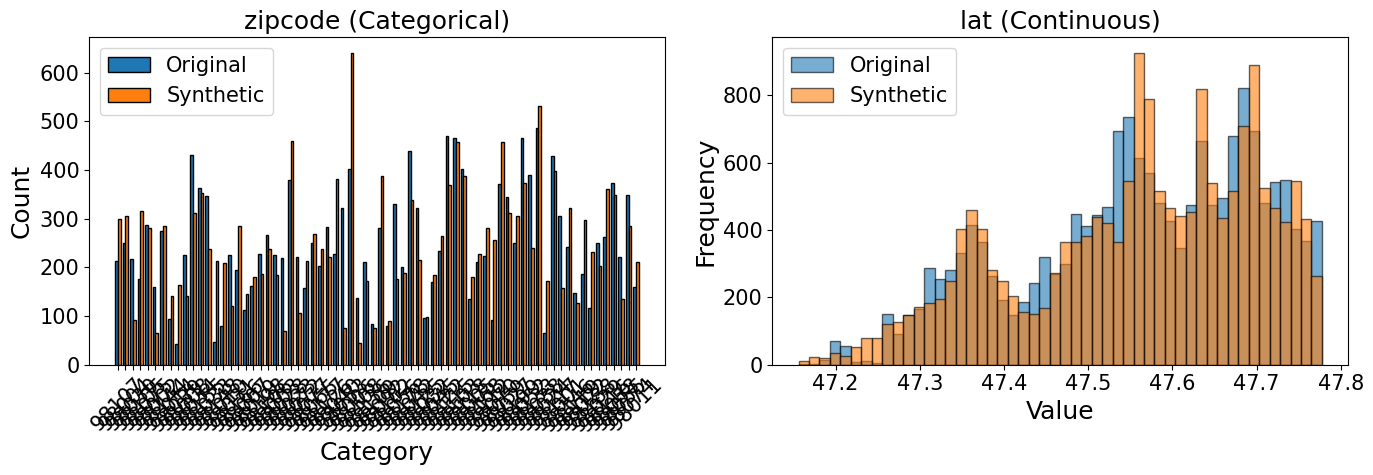

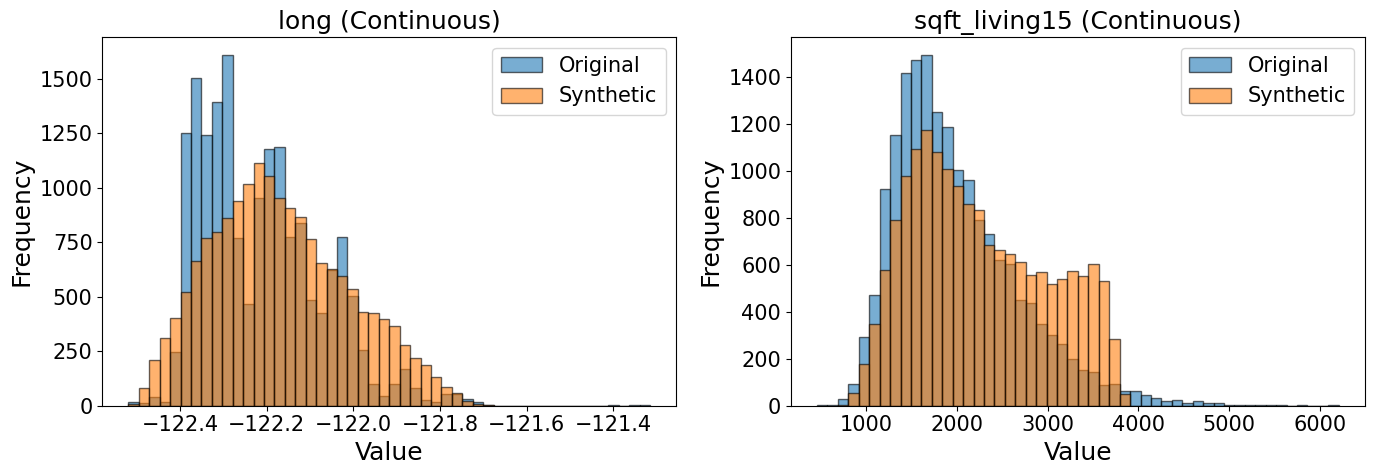

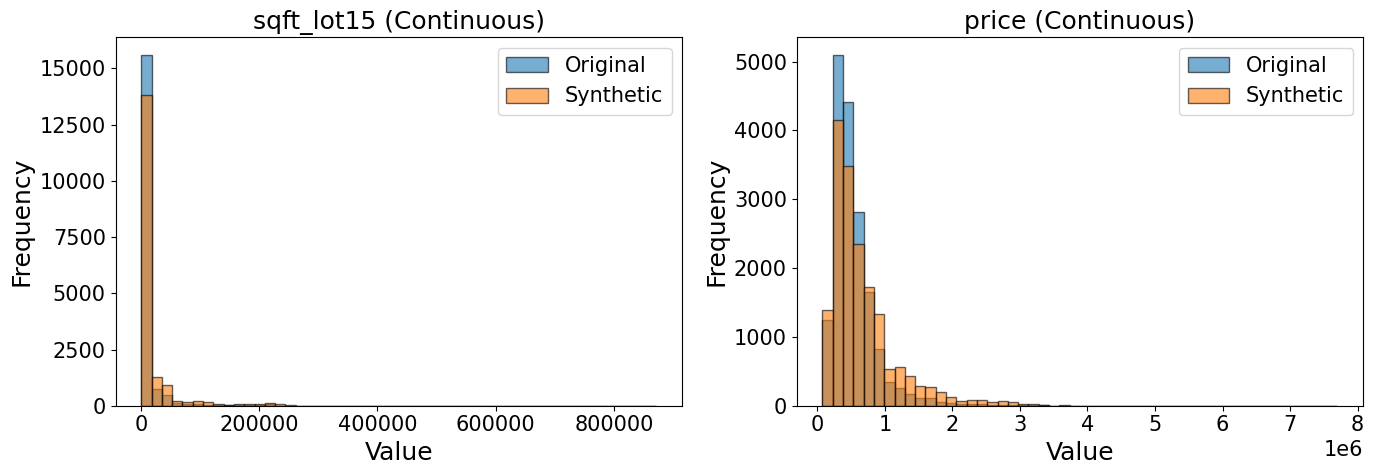

Fake data: ../data_generation/synthetic_data/king_epochs_100_epsilon_1.csv


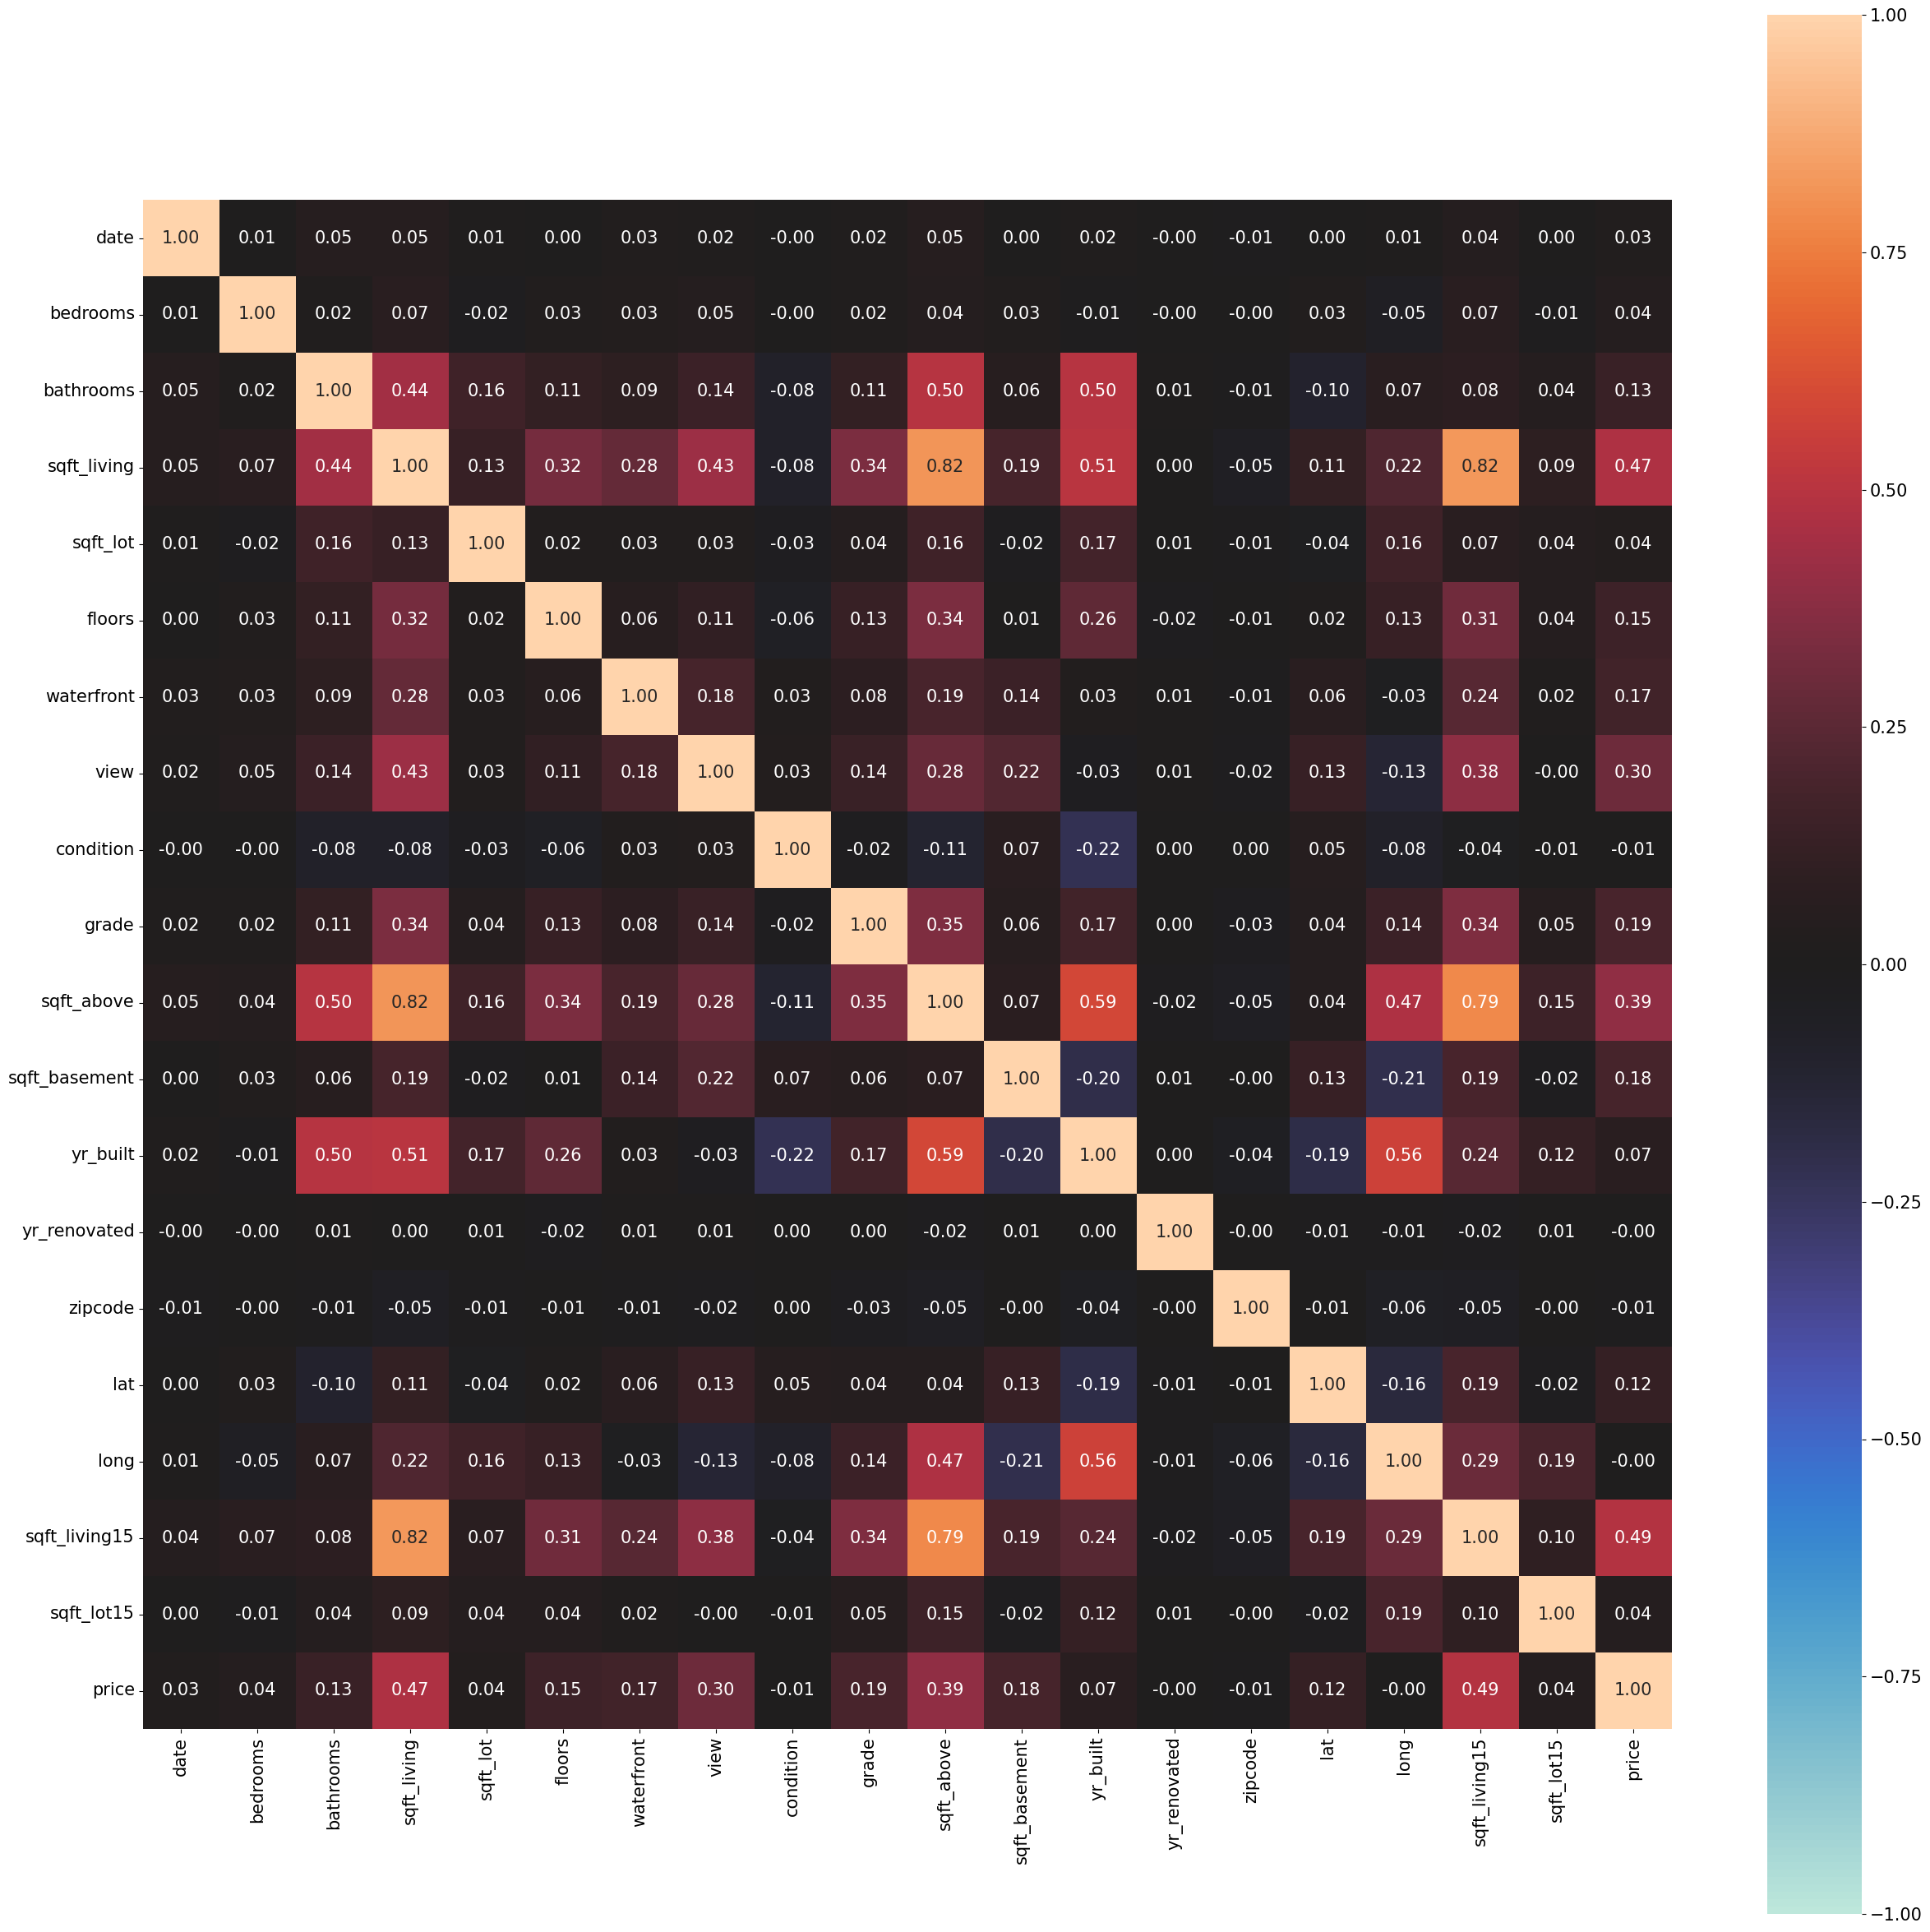

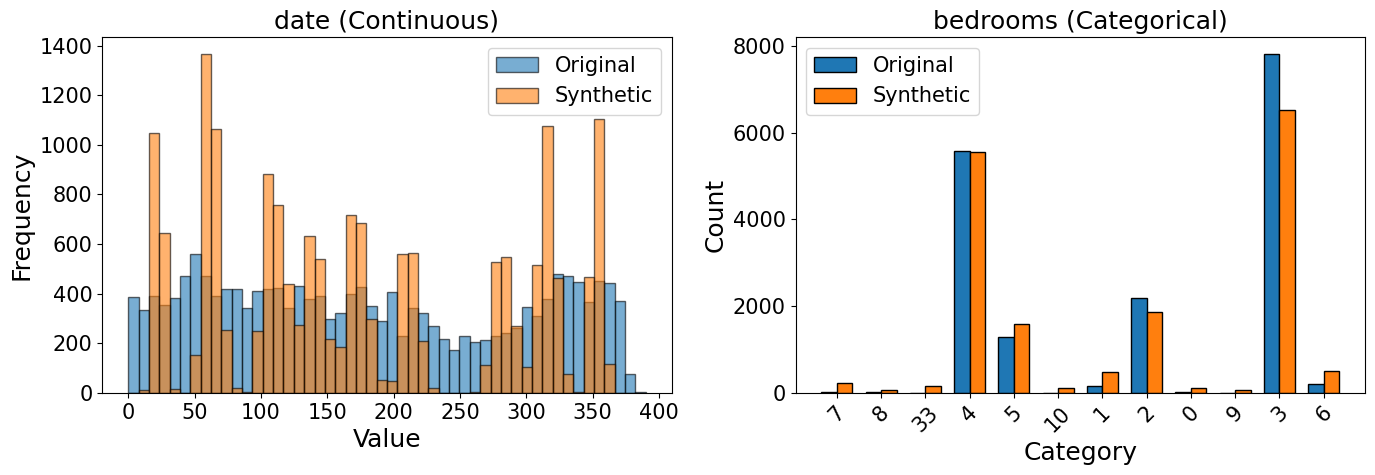

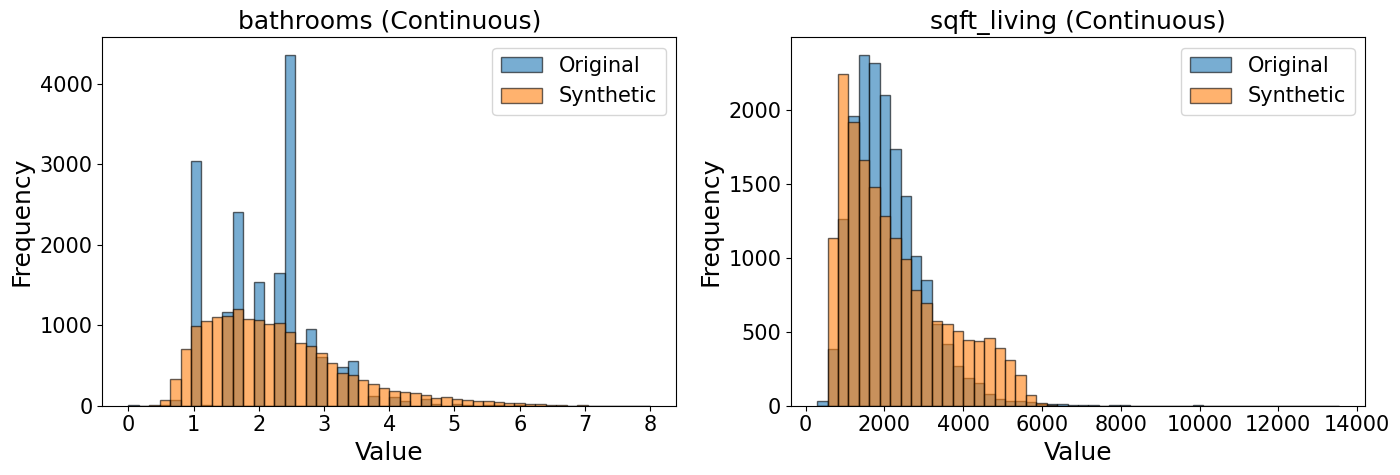

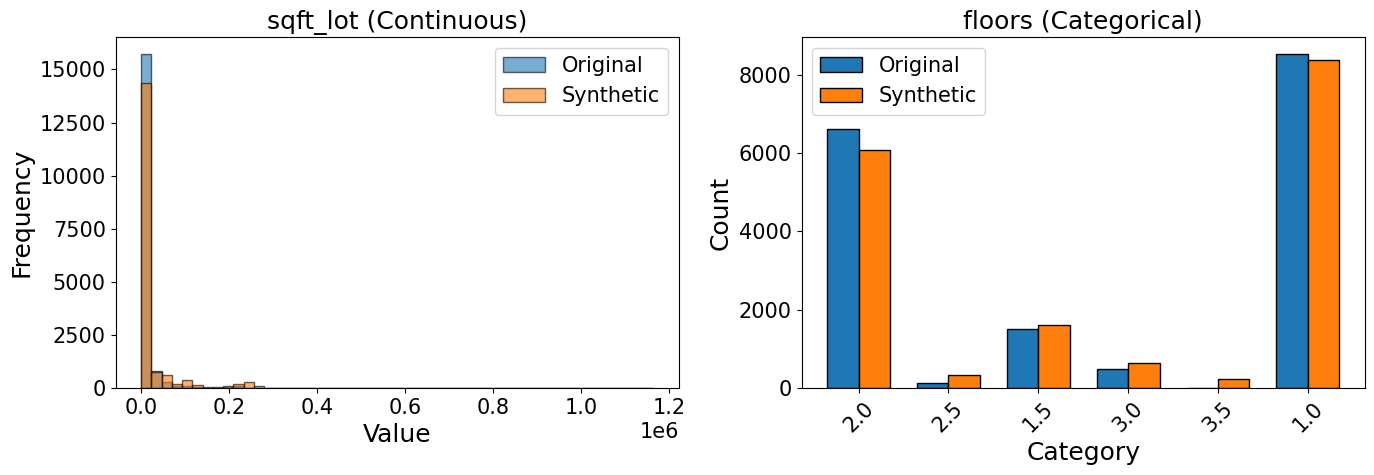

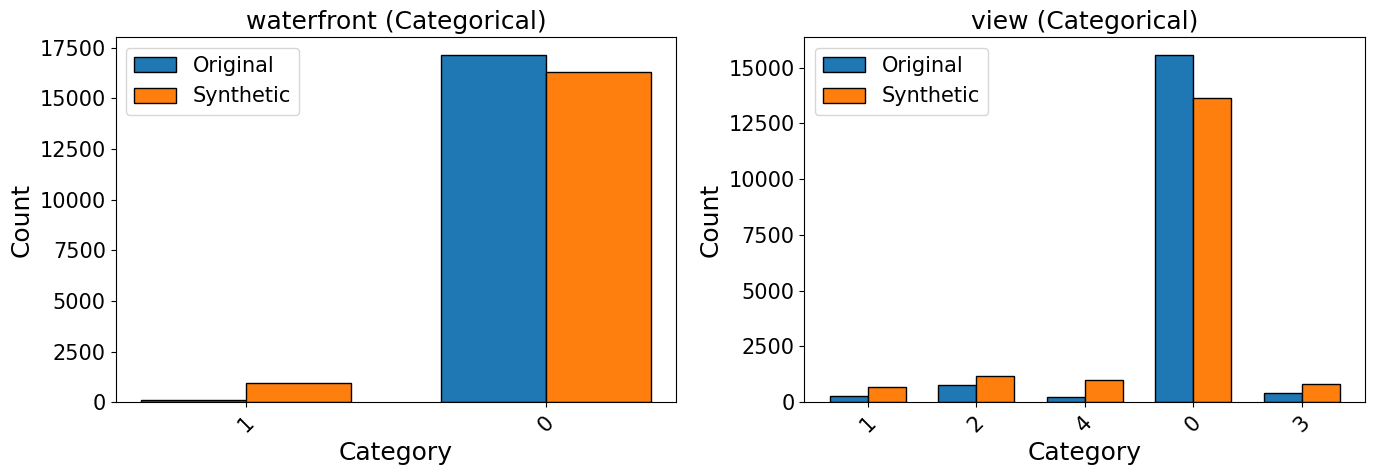

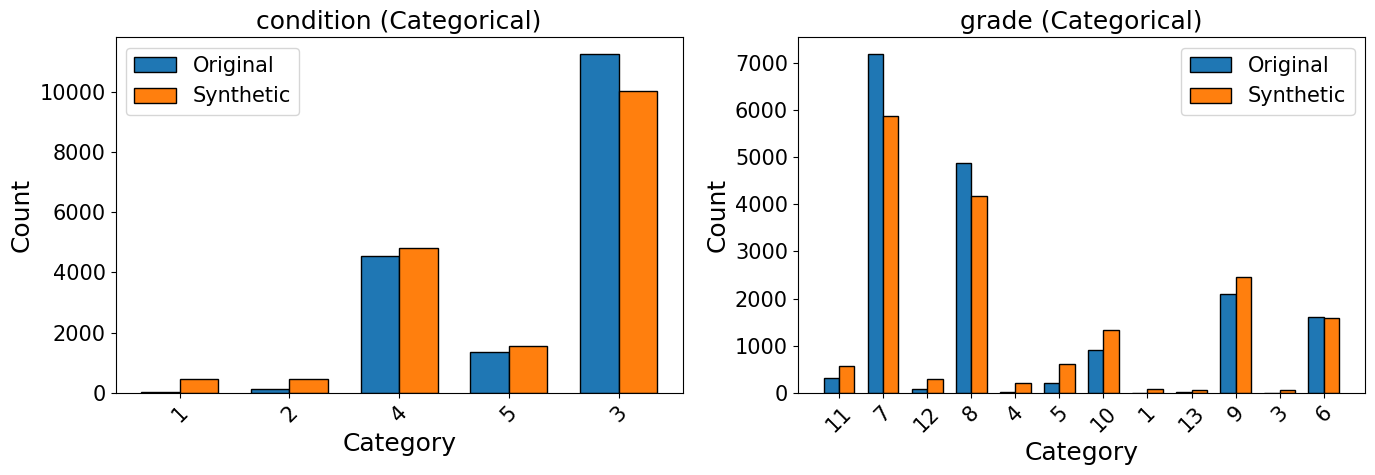

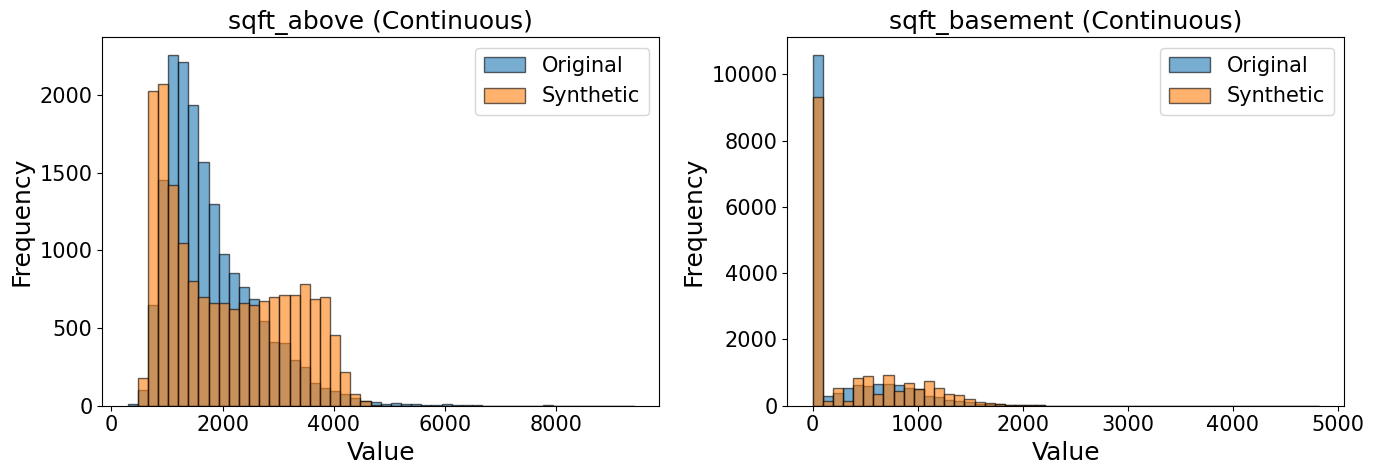

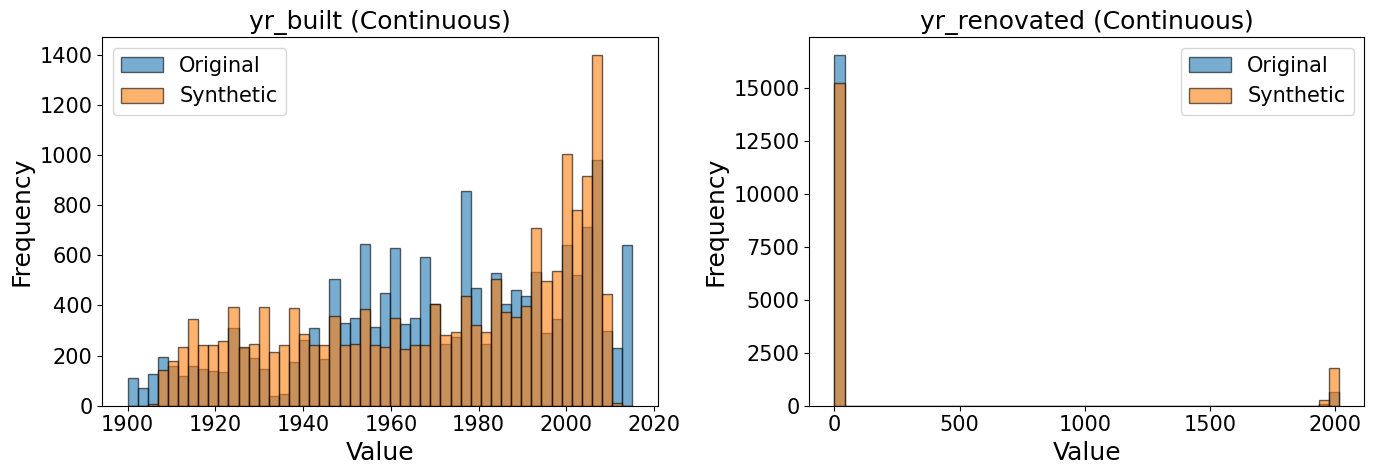

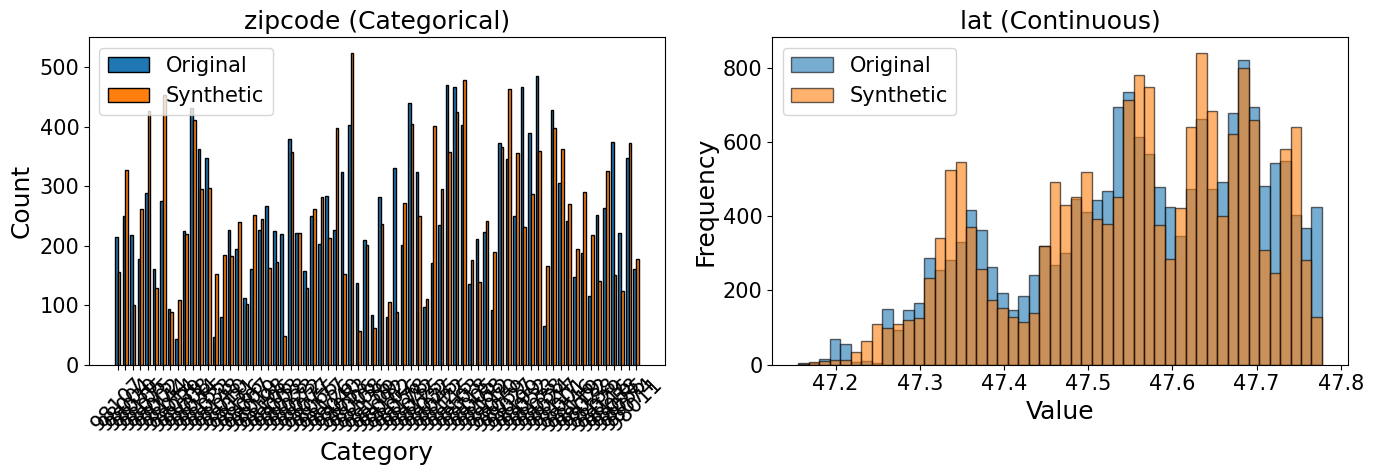

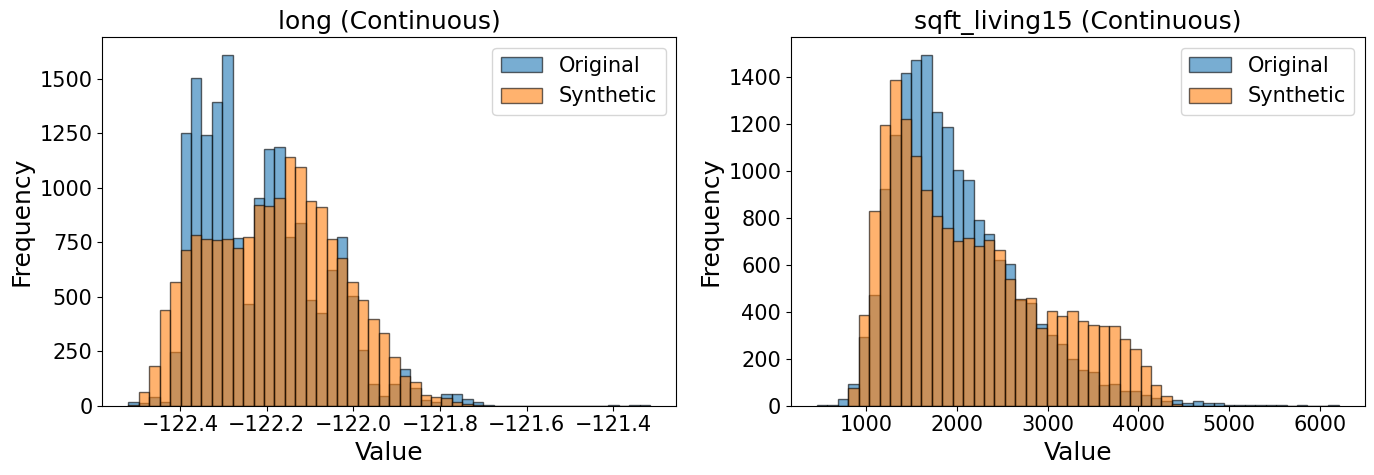

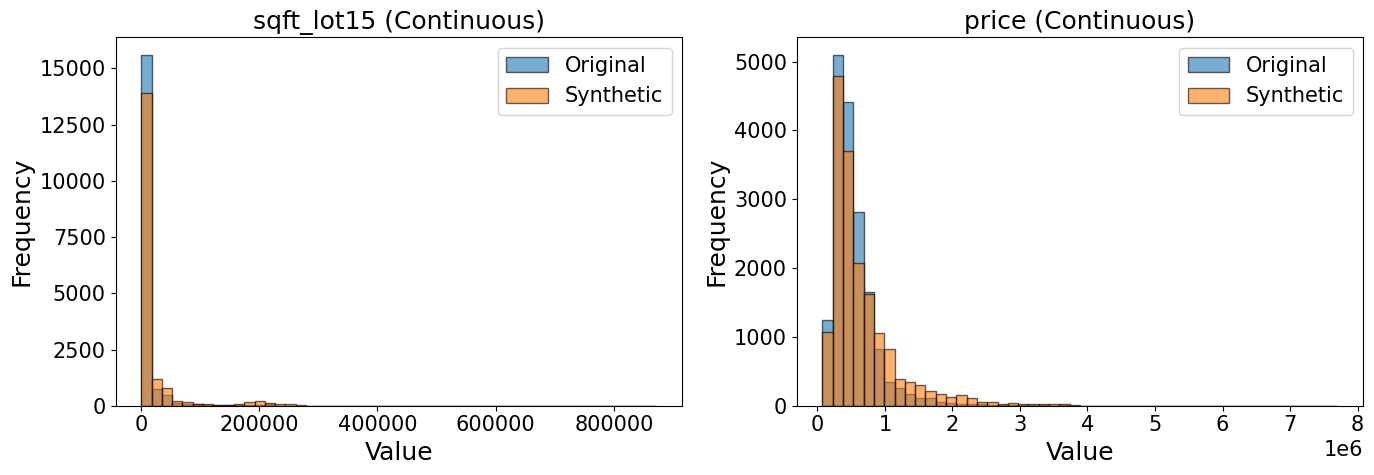

In [5]:



real = pd.read_csv('../datasets/king.csv')

categorical_columns = ['bedrooms', "floors", 'waterfront', 'view', 'condition', 'grade','zipcode']

train, test = evaluation.split_data(real, 0.2, "price",random_state=22,problem='regression')

fakes = [
    '../data_generation/synthetic_data/king_epochs_100_epsilon_None.csv',
    '../data_generation/synthetic_data/king_epochs_100_epsilon_15.csv',
    '../data_generation/synthetic_data/king_epochs_100_epsilon_5.csv',
    '../data_generation/synthetic_data/king_epochs_100_epsilon_1.csv',
]

real_corr = associations(real)["corr"]

for fake_path in fakes:
    fake = pd.read_csv(fake_path)
    print(f'Fake data: {fake_path}')
    fake_corr = associations(fake)["corr"]
    evaluation.compare_dataframes(train,fake,{},categorical_columns=categorical_columns)

Fake data: ../data_generation/synthetic_data/fraud_epochs_100_epsilon_None.csv


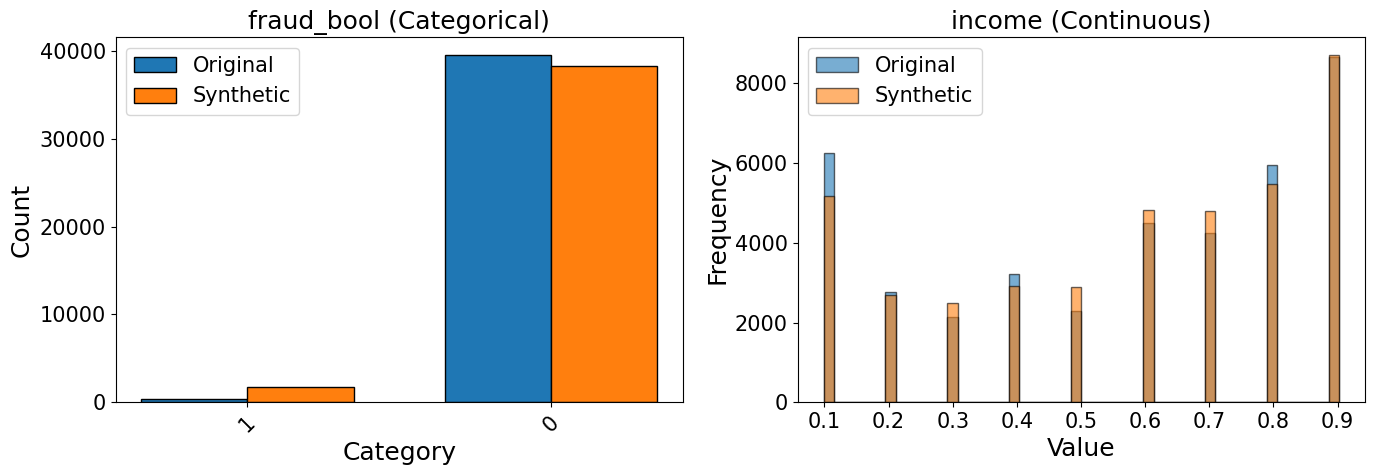

NameError: name 'cat_vals' is not defined

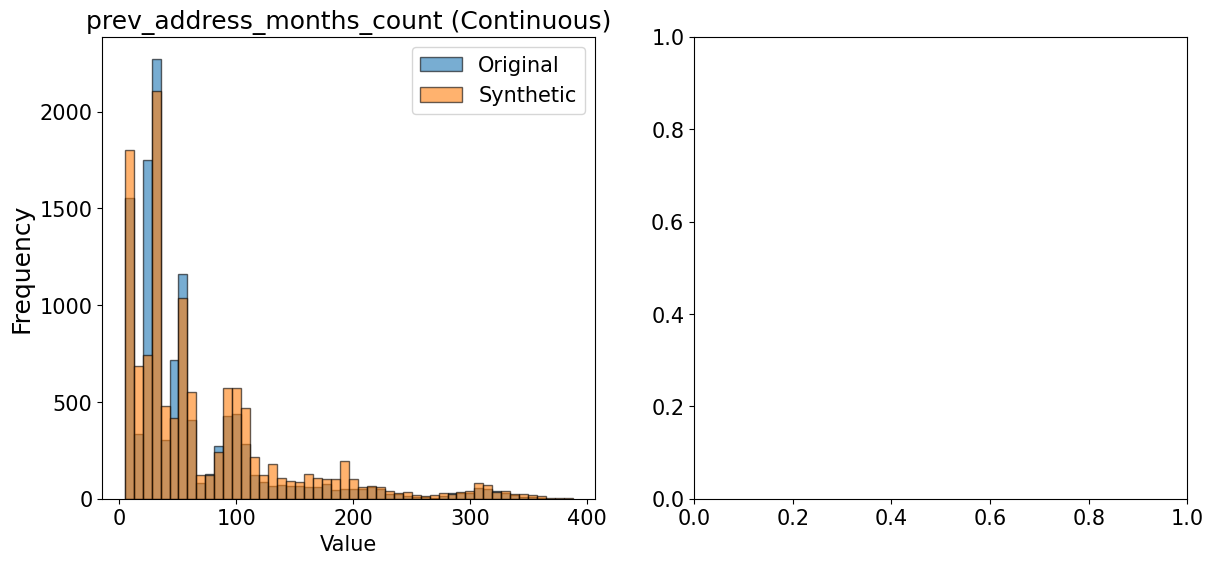

In [6]:

missing_values_columns = ["prev_address_months_count", "current_address_months_count", "device_distinct_emails_8w"]
real = pd.read_csv('../datasets/fraud.csv')
real[missing_values_columns] = real[missing_values_columns].replace(-1, np.nan)

categorical_columns =  ["fraud_bool","payment_type","employment_status","email_is_free","housing_status","device_os","phone_home_valid","has_other_cards","keep_alive_session"]

train, test = evaluation.split_data(real, 0.2, "fraud_bool",random_state=22)

fakes = [
    '../data_generation/synthetic_data/fraud_epochs_100_epsilon_None.csv',
    '../data_generation/synthetic_data/fraud_epochs_100_epsilon_15.csv',
    '../data_generation/synthetic_data/fraud_epochs_100_epsilon_5.csv',
    '../data_generation/synthetic_data/fraud_epochs_100_epsilon_1.csv',
]





for fake_path in fakes:
    fake = pd.read_csv(fake_path)
    fake[missing_values_columns] = fake[missing_values_columns].replace(-1, np.nan)
    print(f'Fake data: {fake_path}')
    compare_dataframes(train,fake,{"prev_address_months_count":[np.nan], "current_address_months_count":[np.nan], "device_distinct_emails_8w":[np.nan]},categorical_columns=categorical_columns)
    break


